## How to look at MITgcm netCDF output, an example

You need to install MITgcmutils package (https://pypi.org/project/MITgcmutils/)

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
import numpy as np
import xarray as xr
import MITgcmutils as MIT
import seaborn as sns

In [2]:
sns.set_context('notebook')
outdir = '../run_expand/mnc_000*/'
outdir2 = '../run_expand_nobay/mnc_000*/' # SIN BAHÍA

In [3]:
outdir_core1 = '../run_expand/mnc_0001/'
outdir_core2 = '../run_expand/mnc_0002/'
outdir_core3 = '../run_expand/mnc_0003/'
outdir_core4 = '../run_expand/mnc_0004/'

In [4]:
nc = MIT.mnc_files(outdir+'state.0000000000.t*.nc')
gr = MIT.mnc_files(outdir+'grid.t*.nc')
nc_bay = MIT.mnc_files(outdir2+'state.0000000000.t*.nc') #No bay
#gr2 = MIT.mnc_files(outdir2+'grid.t*.nc')

In [5]:
# STATE
nc_1 = MIT.mnc_files(outdir_core1+'state.0000000000.t*.nc')
nc_2 = MIT.mnc_files(outdir_core2+'state.0000000000.t*.nc')
nc_3 = MIT.mnc_files(outdir_core3+'state.0000000000.t*.nc')
nc_4 = MIT.mnc_files(outdir_core4+'state.0000000000.t*.nc')

# GRID
gr_1 = MIT.mnc_files(outdir_core1+'grid.t*.nc')
gr_2 = MIT.mnc_files(outdir_core2+'grid.t*.nc')
gr_3 = MIT.mnc_files(outdir_core3+'grid.t*.nc')
gr_4 = MIT.mnc_files(outdir_core4+'grid.t*.nc')


In [5]:
import glob
from MITgcmutils import netcdf

# Asegúrate de que la variable `outdir` esté definida y sea correcta
for file in glob.glob(outdir + 'grid.t*.nc'):
    try:
        nc_file = netcdf.netcdf_file(file, 'r')
        print(f"Archivo {file} leído correctamente")
    except Exception as e:
        print(f"Error al leer {file}: {e}")


Archivo ../run_expand/mnc_0001/grid.t206.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t187.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t174.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t222.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t140.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t160.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t253.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t202.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t154.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t236.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t144.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t170.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t252.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t203.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t192.nc leído correctamente
Archivo ../run_expand/mnc_0001/grid.t155

In [6]:
# Load some grid variables
depth = gr.variables['Depth'][:]
hFacC = gr.variables['HFacC'][:]
XC = gr.variables['XC'][:]
YC = gr.variables['YC'][:]
XG = gr.variables['XG'][:]
YG = gr.variables['YG'][:]
RC = gr.variables['RC'][:]
RL = gr.variables['RL'][:]
mask = np.ma.getmask(np.ma.masked_values(depth, 0))
mask3D = np.ma.getmask(np.ma.masked_values(hFacC[:,:], 0))
time = nc.variables['T'][:]
timetotal = nc.variables['T'][:]

In [ ]:
# Load grid variables for certain core
depth = gr_2.variables['Depth'][:]
hFacC = gr_2.variables['HFacC'][:]
XC = gr_2.variables['XC'][:]
YC = gr_2.variables['YC'][:]
XG = gr_2.variables['XG'][:]
YG = gr_2.variables['YG'][:]
RC = gr_2.variables['RC'][:]
RL = gr_2.variables['RL'][:]
mask = np.ma.getmask(np.ma.masked_values(depth, 0))
mask3D = np.ma.getmask(np.ma.masked_values(hFacC[:,:], 0))
time = nc_2.variables['T'][:]
timetotal = nc_2.variables['T'][:]

In [6]:
mask3D.shape

(50, 320, 272)

In [8]:
nc_1.variables

{'T': <MITgcmutils.mnc.MNCVariable at 0x30f7b2300>,
 'iter': <MITgcmutils.mnc.MNCVariable at 0x313618170>,
 'Xp1': <MITgcmutils.mnc.MNCVariable at 0x16fcebc80>,
 'Y': <MITgcmutils.mnc.MNCVariable at 0x3121fa2a0>,
 'Z': <MITgcmutils.mnc.MNCVariable at 0x16fd0df10>,
 'U': <MITgcmutils.mnc.MNCVariable at 0x16fd0f110>,
 'X': <MITgcmutils.mnc.MNCVariable at 0x16fd0e450>,
 'Yp1': <MITgcmutils.mnc.MNCVariable at 0x16fd0e690>,
 'V': <MITgcmutils.mnc.MNCVariable at 0x16fd0e270>,
 'Temp': <MITgcmutils.mnc.MNCVariable at 0x16fd0cb00>,
 'S': <MITgcmutils.mnc.MNCVariable at 0x16fd0f230>,
 'Eta': <MITgcmutils.mnc.MNCVariable at 0x16fd207a0>,
 'Zl': <MITgcmutils.mnc.MNCVariable at 0x16fd20800>,
 'W': <MITgcmutils.mnc.MNCVariable at 0x16fd20620>}

In [7]:
W = nc_1.variables['W']
W.shape

(61, 50, 320, 272)

In [8]:

W_max = np.max(W[:])

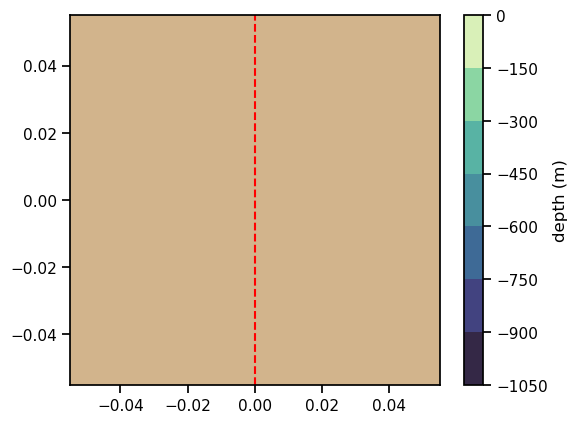

In [9]:
# Plot bathymetry
fig, ax = plt.subplots(1,1)
ax.set_facecolor('tan')
pc = ax.contourf(XC[0,:],YC[:,0],
                np.ma.masked_array(-depth, mask=mask),
                cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, label='depth (m)')
# Añade una línea en el eje Y para una coordenada específica en XC
x_coord = XC[0,136]# Cambia este valor a la coordenada de XC donde quieres la línea
ax.axvline(x=x_coord, color='red', linestyle='--', label=f'XC = {x_coord}')

ax.set_aspect(1)  

In [25]:
Eta = nc.variables['Eta']
Eta.shape

(61, 320, 272)

In [26]:
W = nc.variables['W'][:,:,:,:]
W.shape

(61, 50, 320, 272)

In [27]:
len(time)

61

W[time,Z,RC,YC,XC]

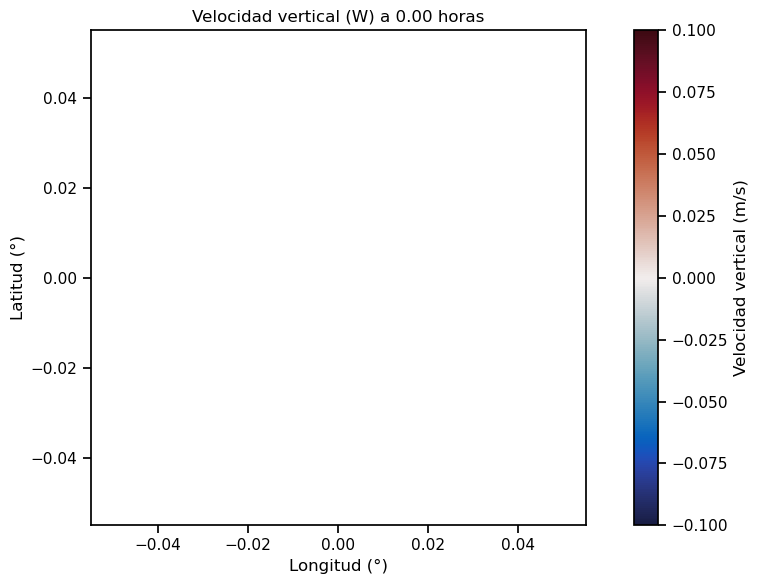

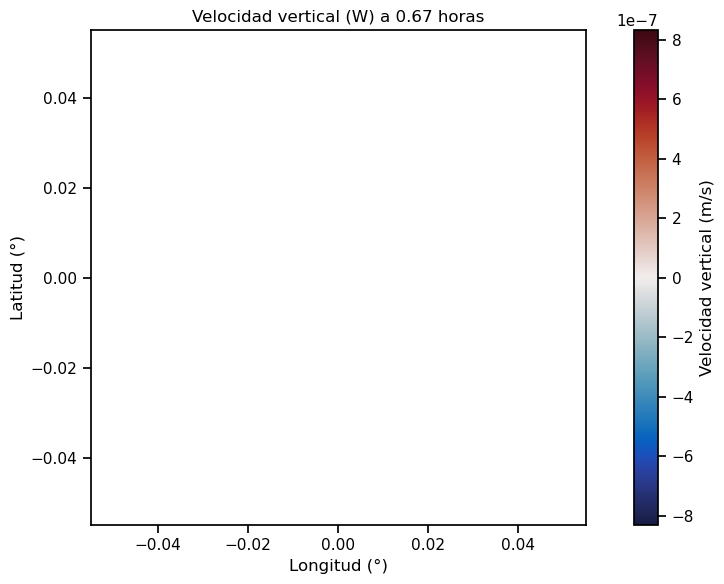

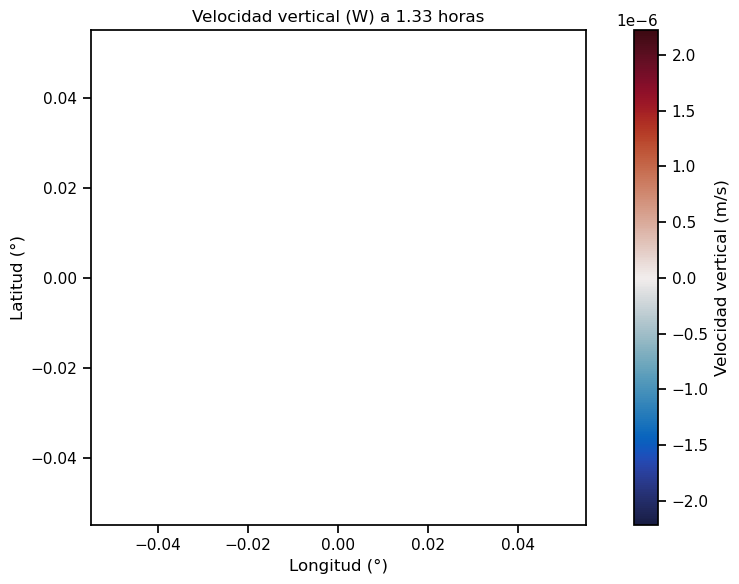

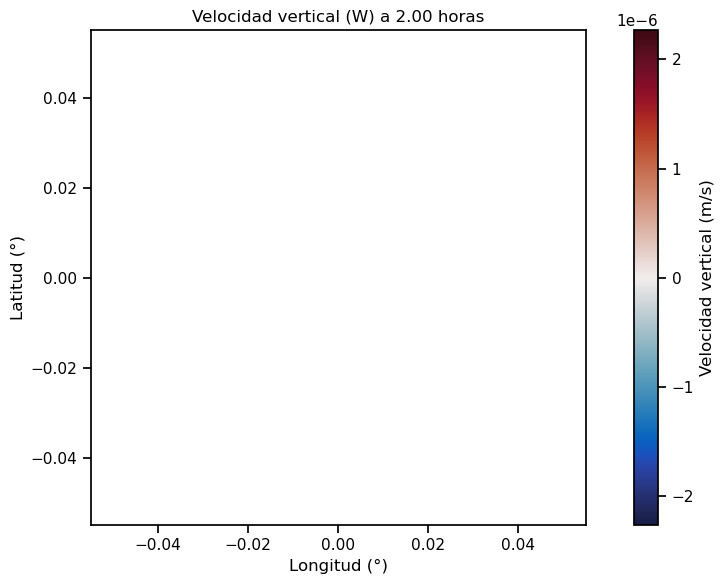

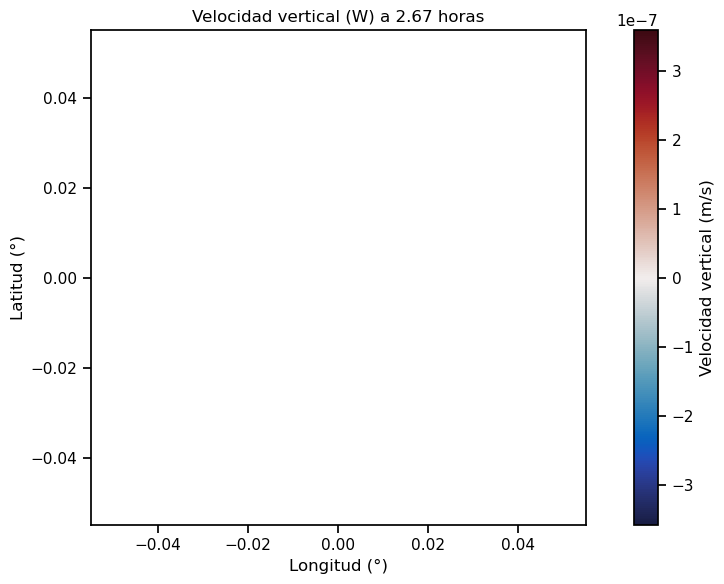

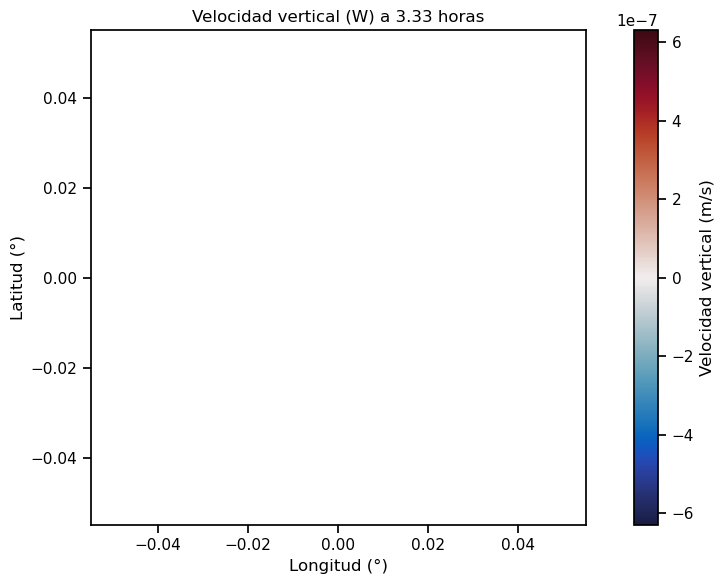

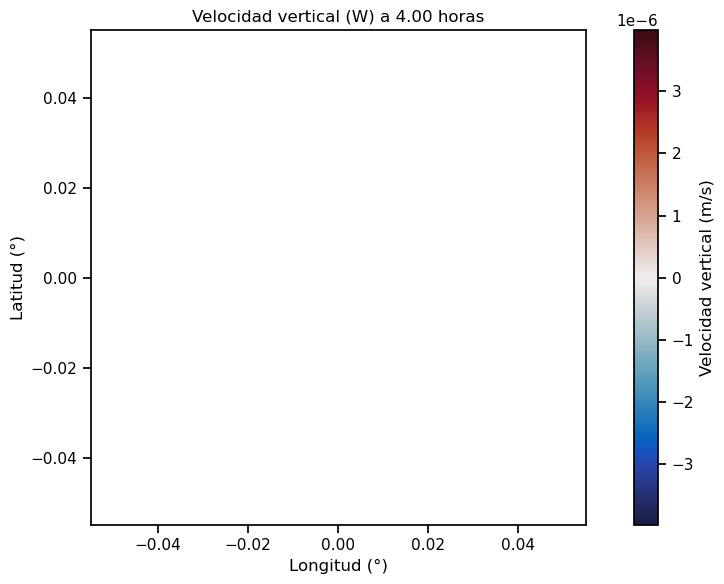

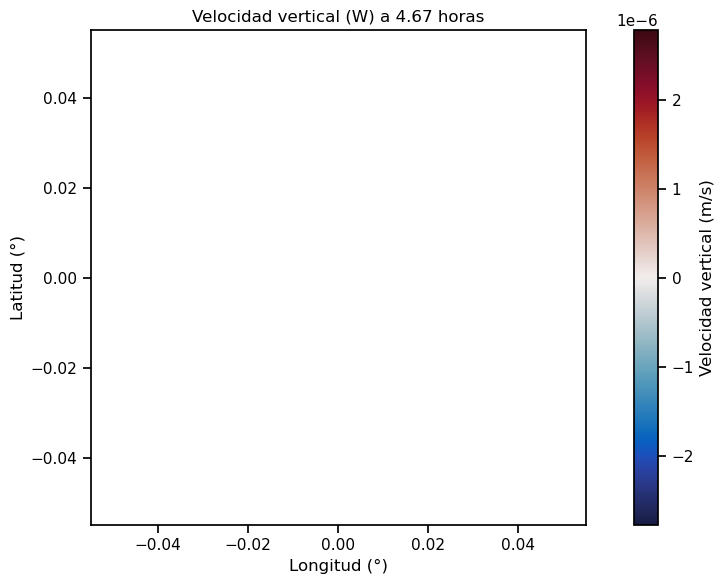

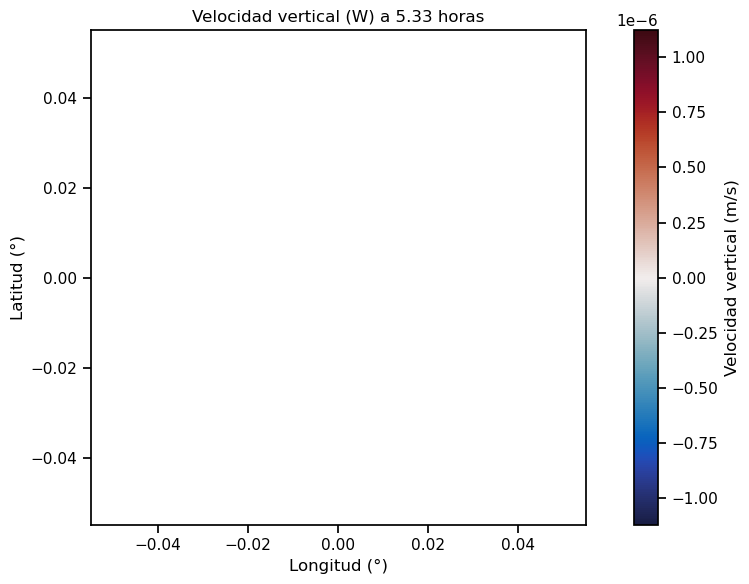

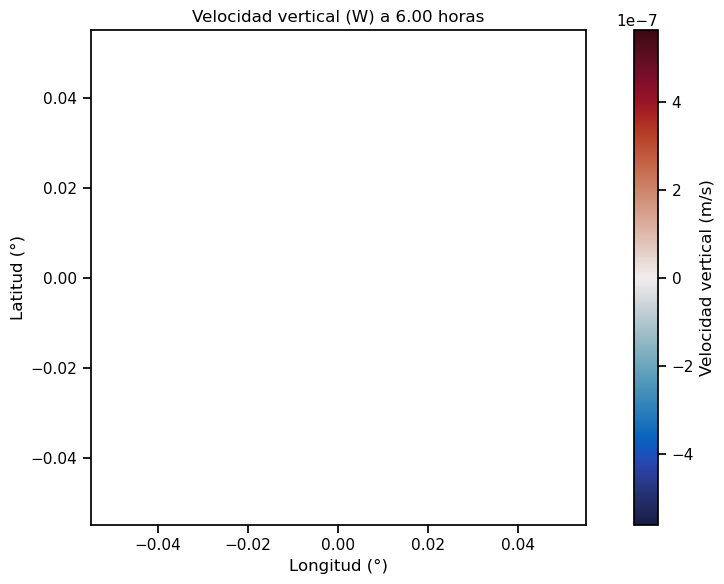

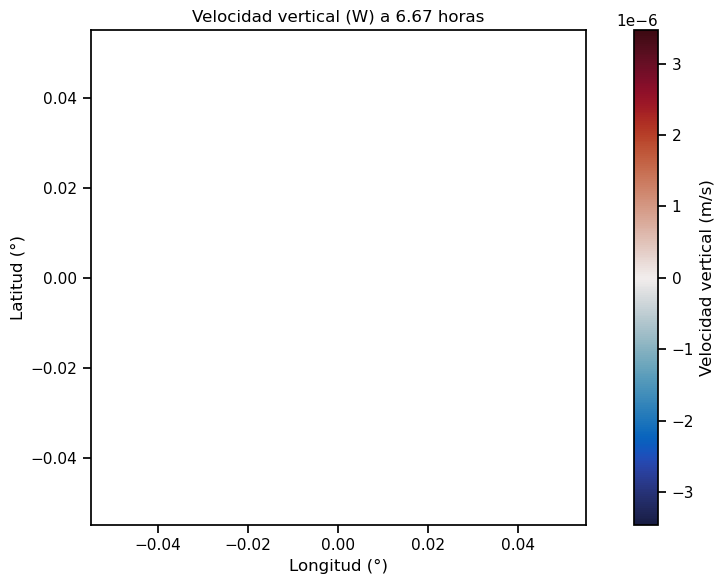

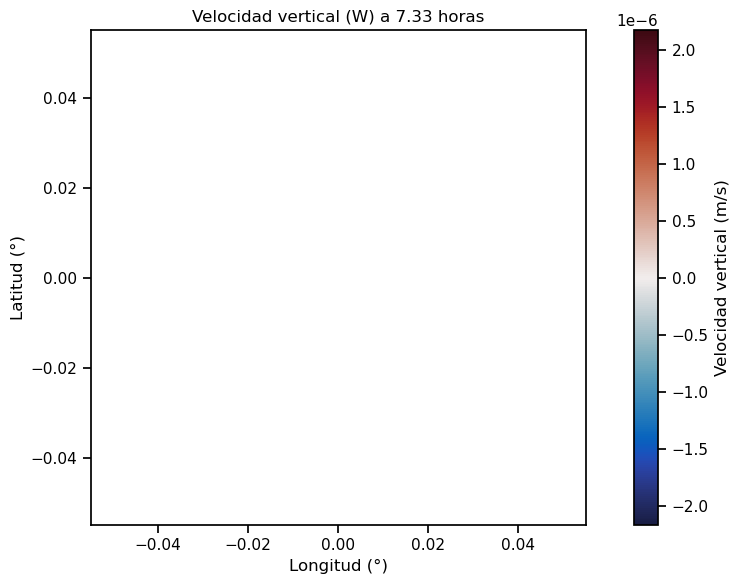

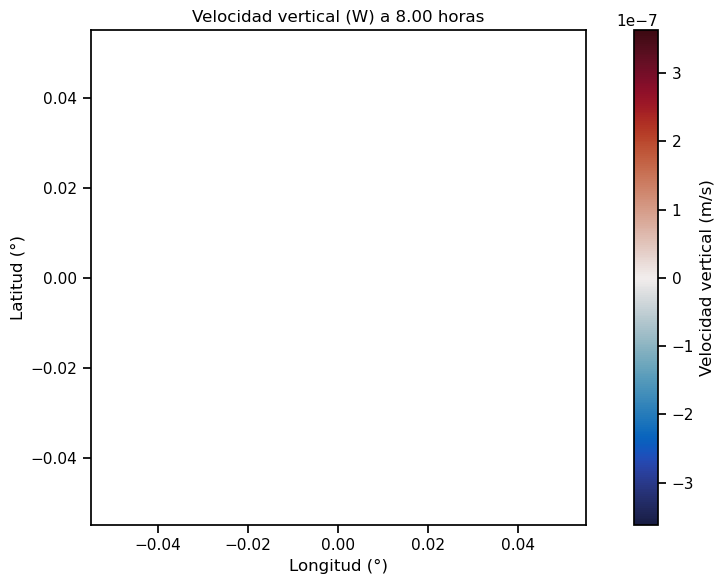

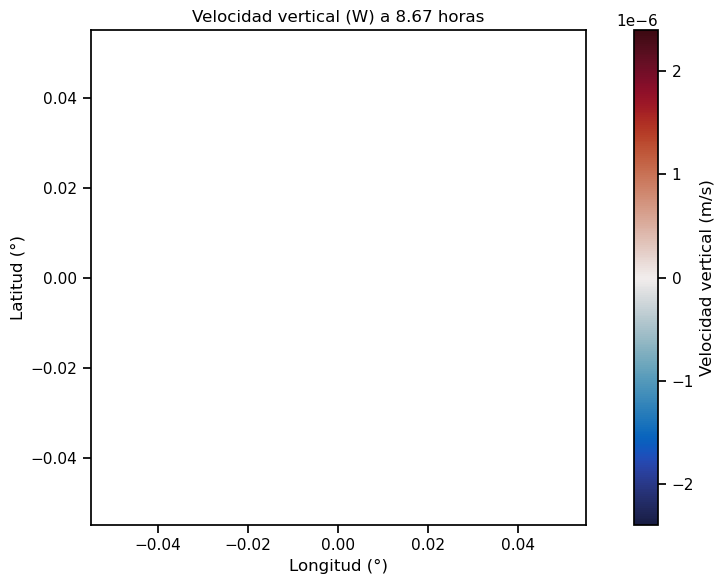

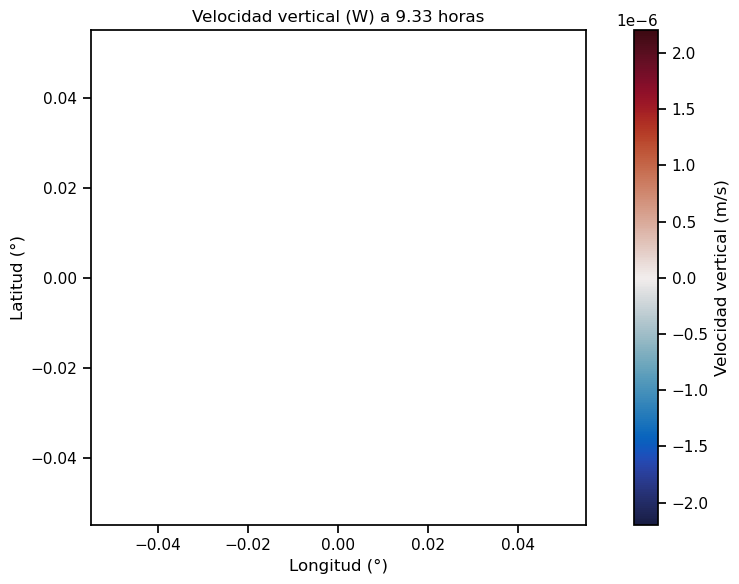

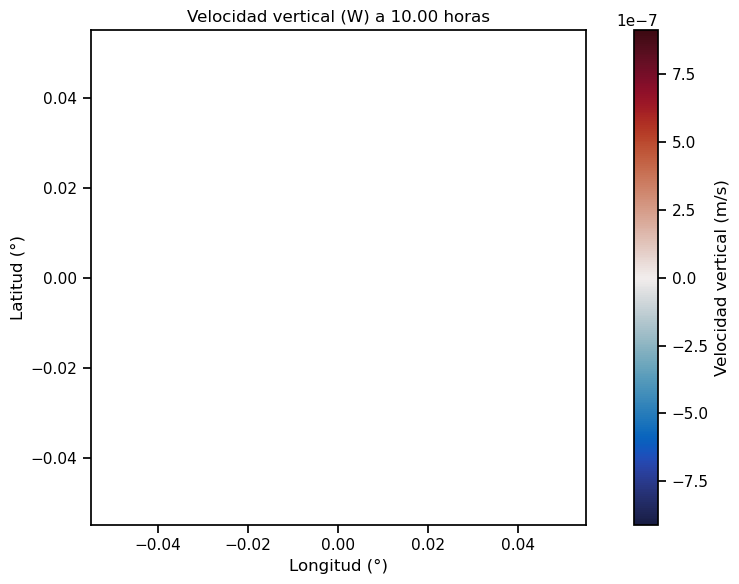

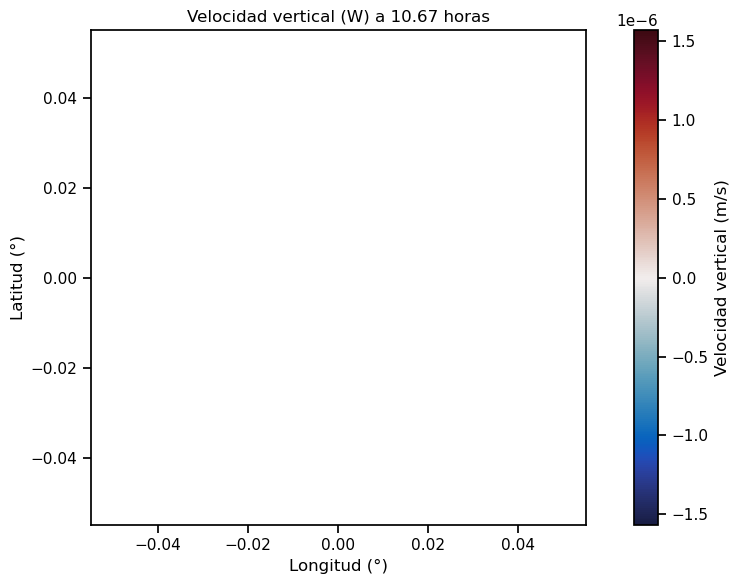

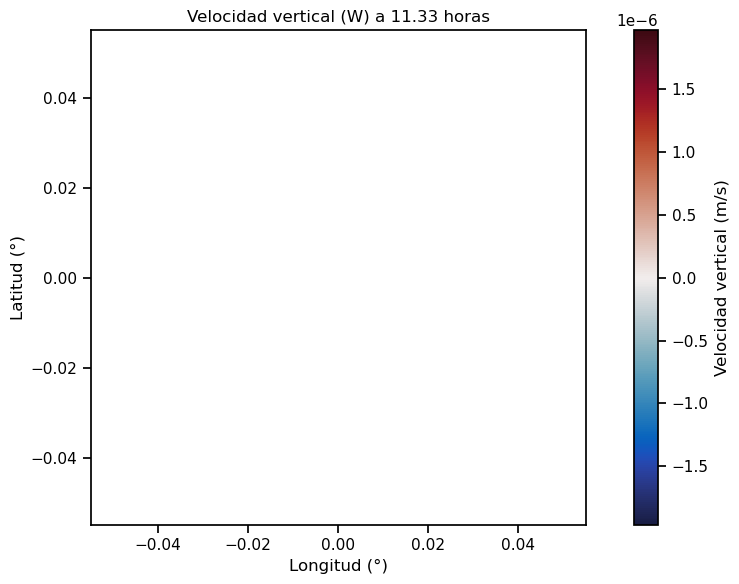

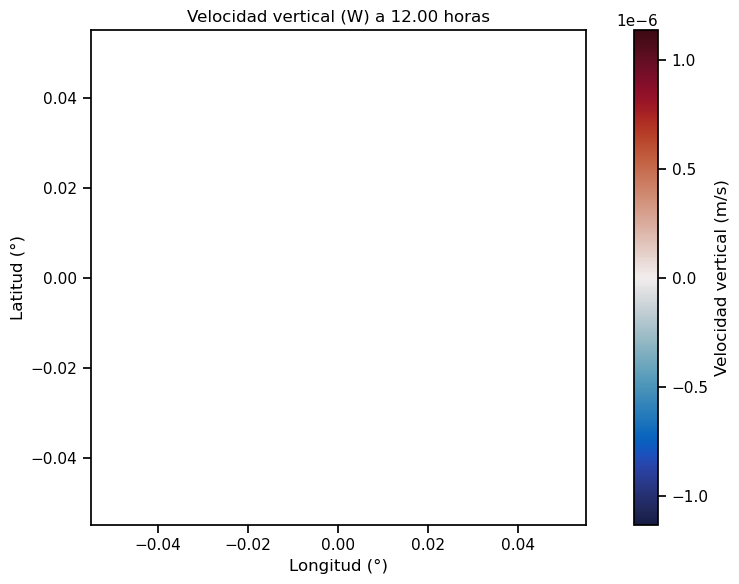

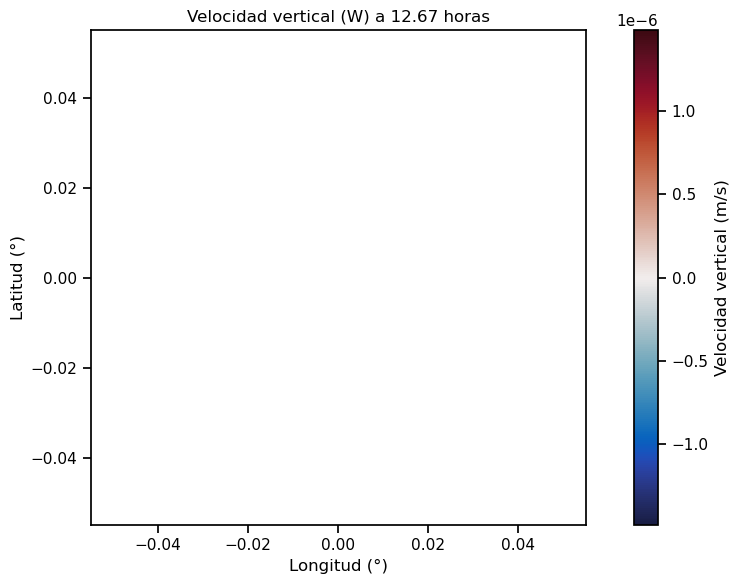

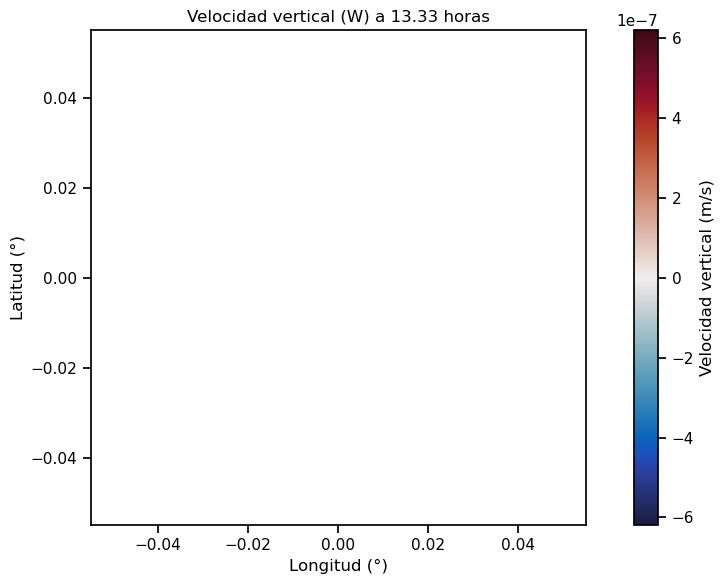

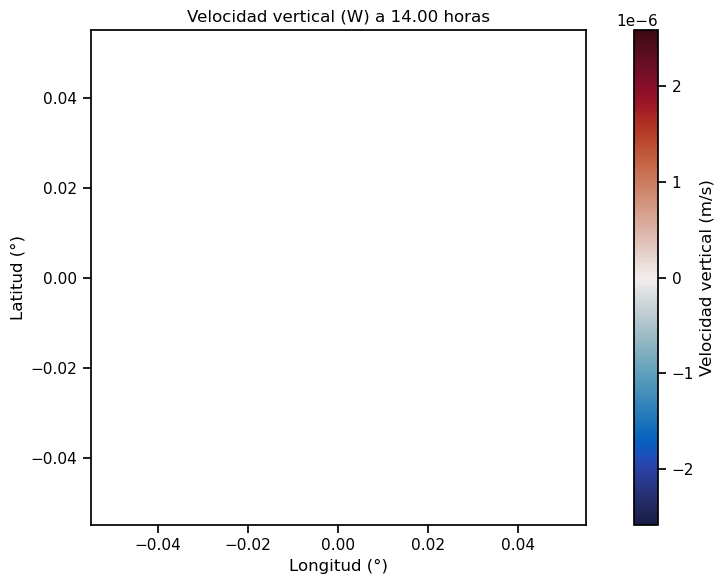

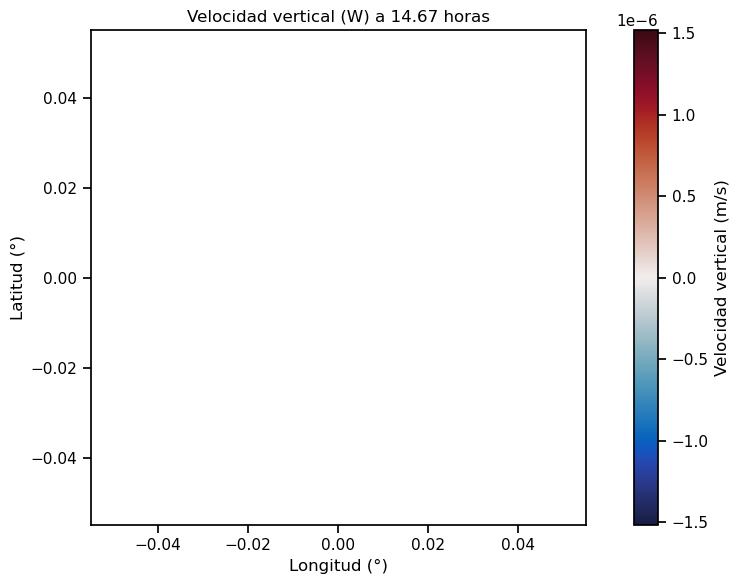

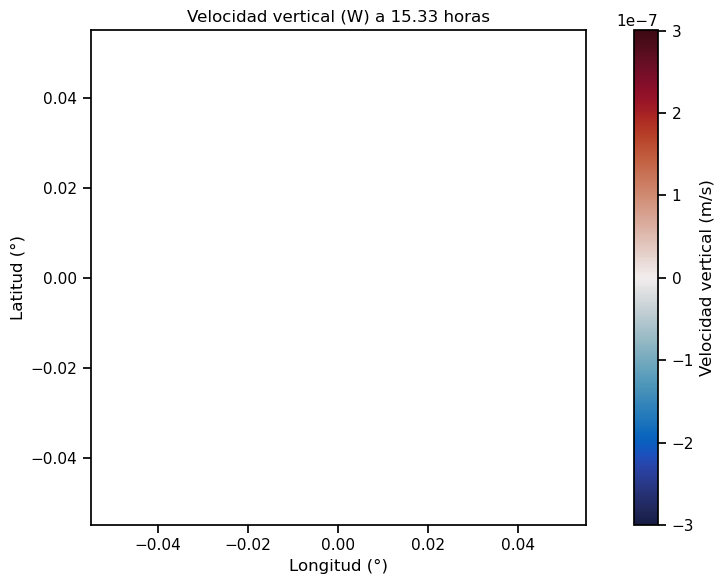

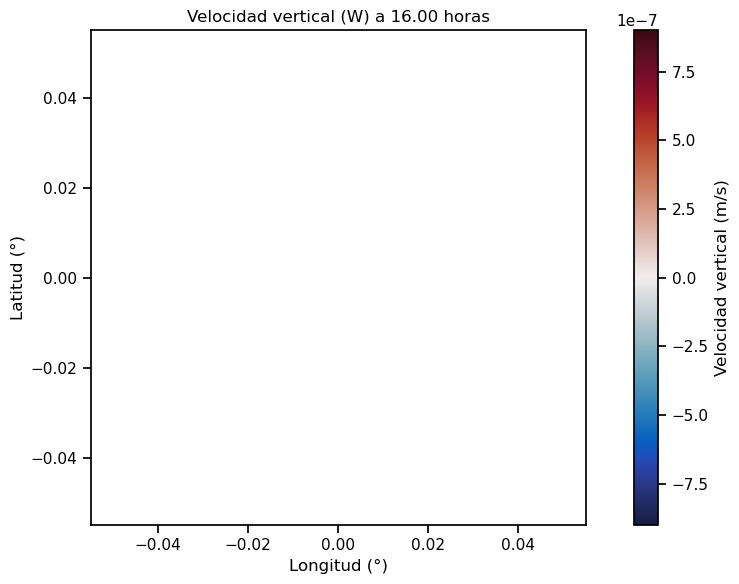

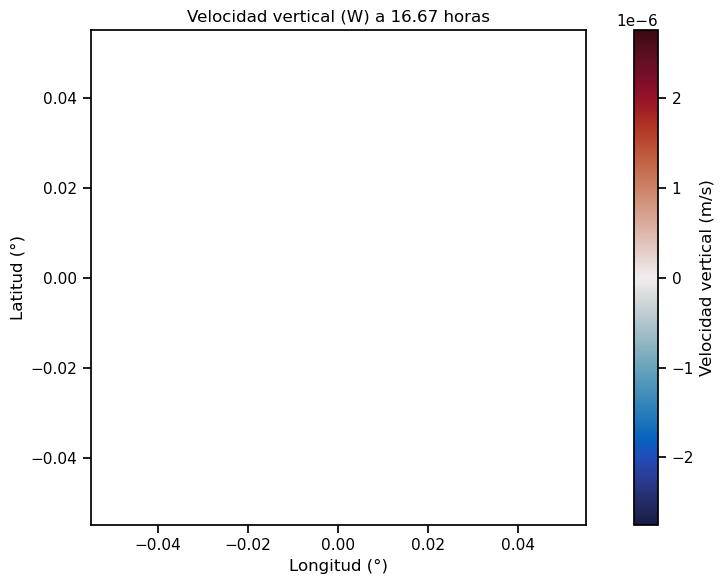

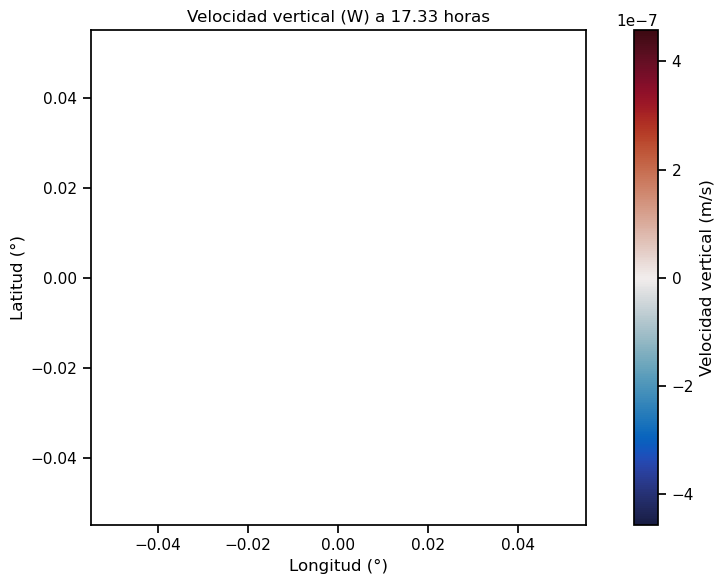

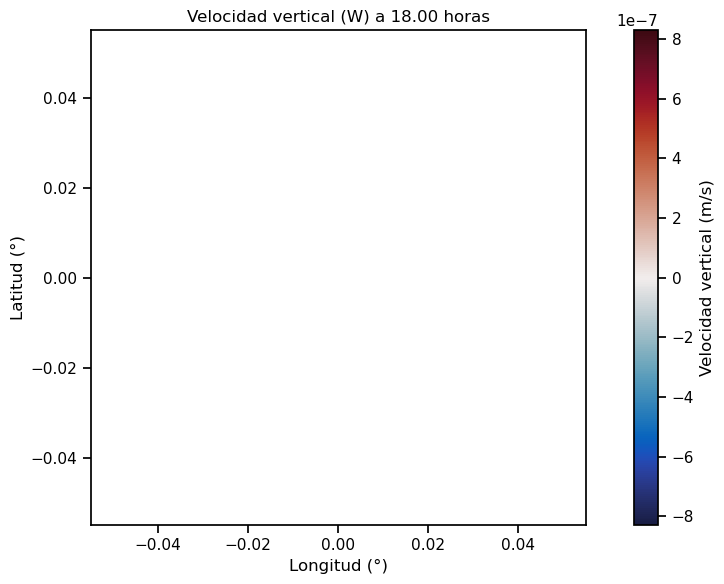

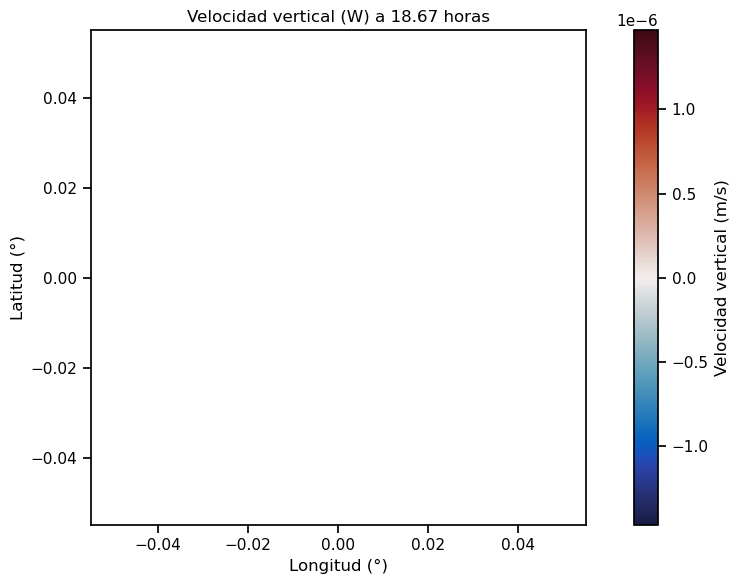

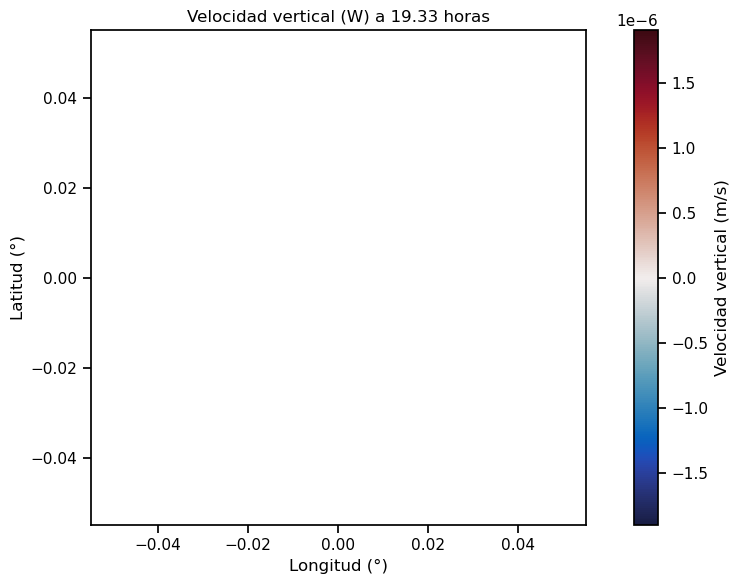

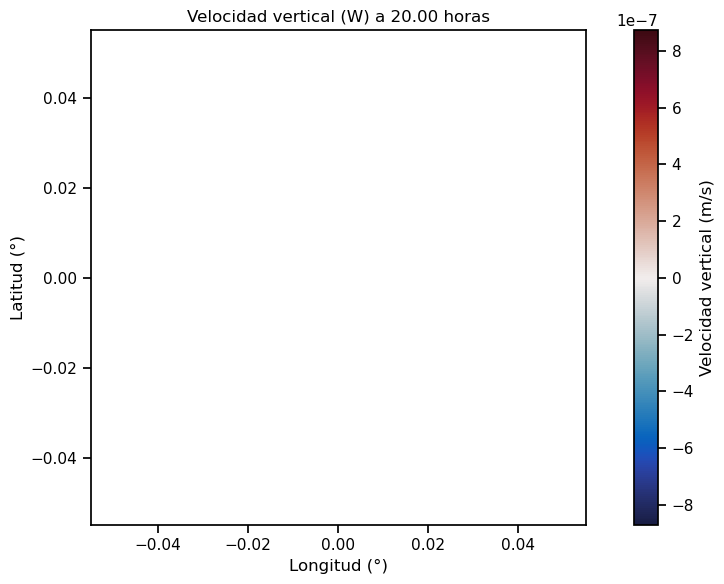

In [16]:
#Velocidad vertical (W) a los 222.40 m de profundidad.
#for tt in range(0,len(time),2):
#    W = nc.variables['W'][tt,25,:,:]
#   plt.pcolormesh(XC[0,:],YC[:,0],W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
#    plt.colorbar()
#    plt.title(f'time={time[tt]/3600} h')
#    plt.show()

# Iterar sobre el tiempo en intervalos de 2
for tt in range(0, len(time), 2):
    W1 = nc_4.variables['W'][tt, 25, :, :]  # Velocidad vertical a la profundidad deseada con bahia
    W2 = nc_4.variables['W'][tt, 25, :, :]  #Sin bahia
    W = W1#-W2
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
    #mesh = ax.pcolormesh(XC[0, :], YC[:, 0], W, vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
    mesh = ax.pcolormesh(XC[0, :], YC[:, 0], W, vmin=-np.max(W), vmax=np.max(W), cmap=cmo.cm.balance)
    fig.colorbar(mesh, ax=ax, label='Velocidad vertical (m/s)')  # Etiqueta de la barra de colores
    ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
    ax.set_title(f'Velocidad vertical (W) a {time[tt]/3600:.2f} horas')
    ax.set_xlabel('Longitud (°)')
    ax.set_ylabel('Latitud (°)')
    ax.set_aspect(1)  # Proporciones iguales en x e y
    plt.tight_layout()
    plt.show()

In [29]:
W

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.]])

In [30]:
Eta1 = nc.variables['Eta'][:, :, :]
Eta_NB= nc2.variables['Eta'][:,:,:]
Eta= Eta1- Eta_NB
max_E=np.max(np.max(Eta))
print(max_E)
min_E=np.min(np.min(Eta))
print(min_E)

0.06819822651284563
-0.03132872439363829


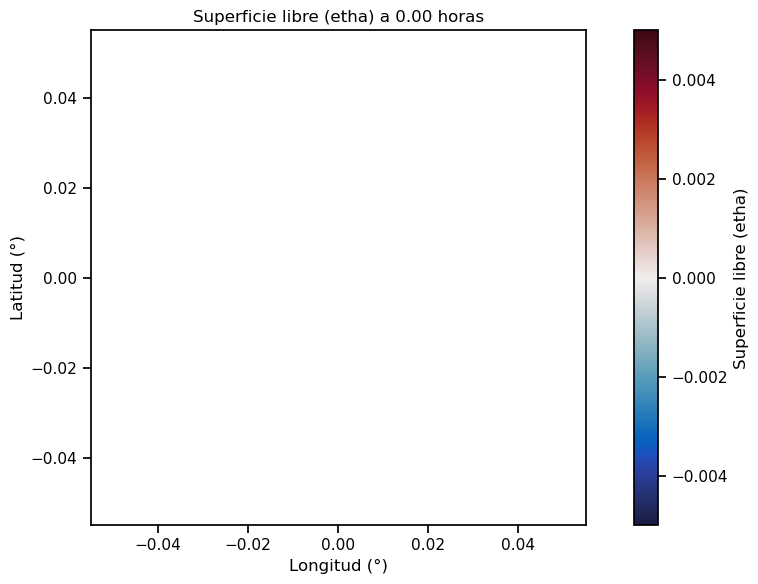

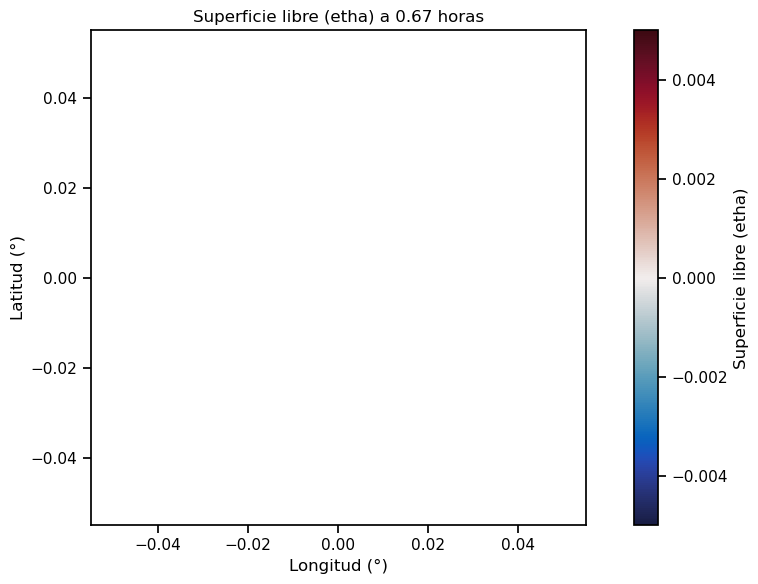

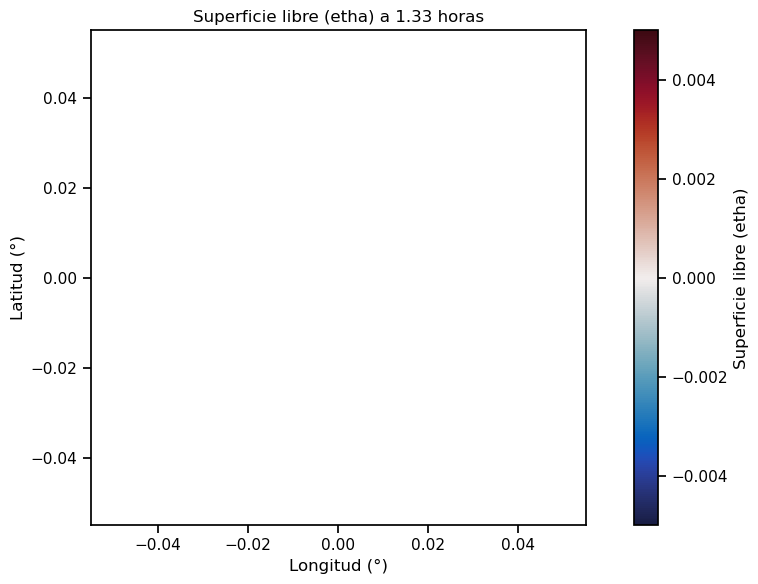

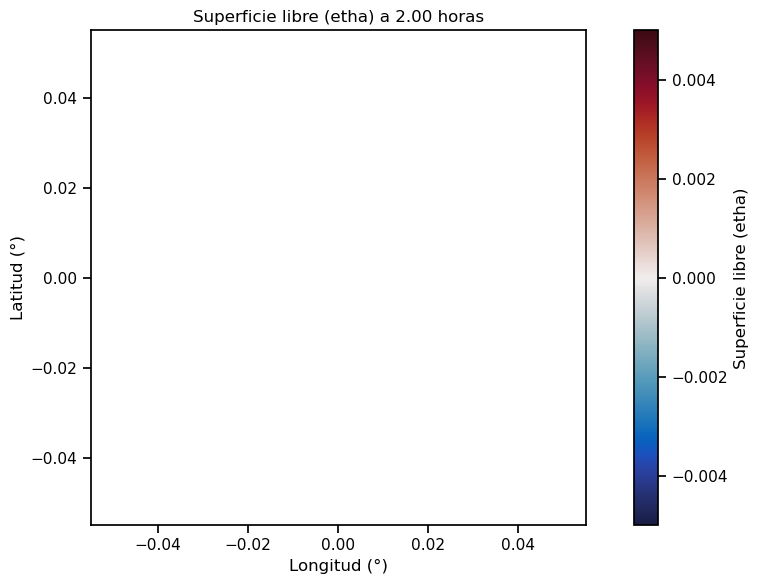

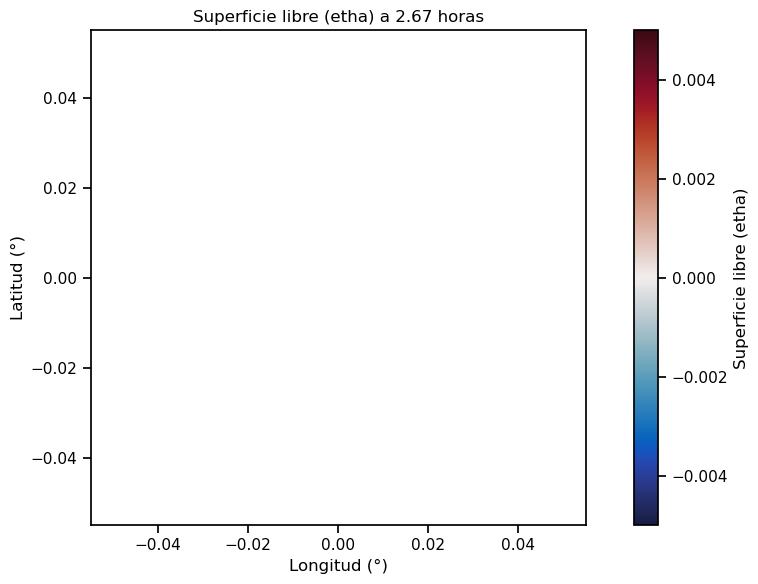

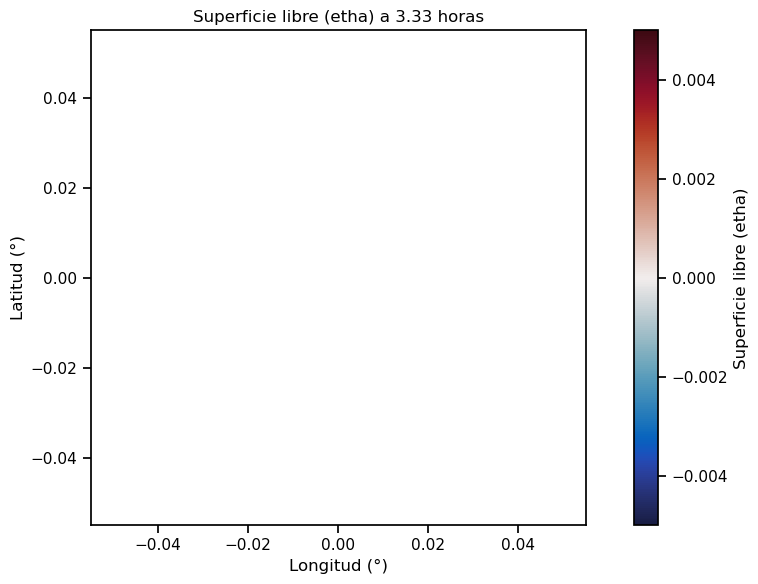

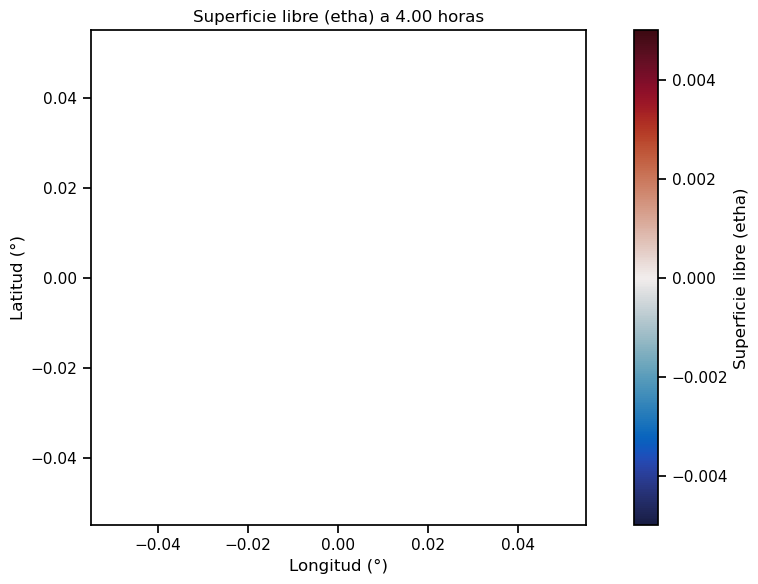

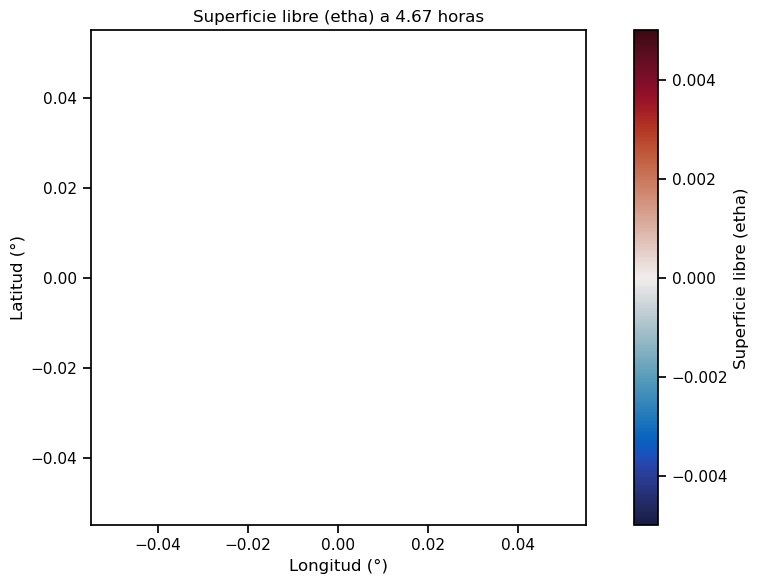

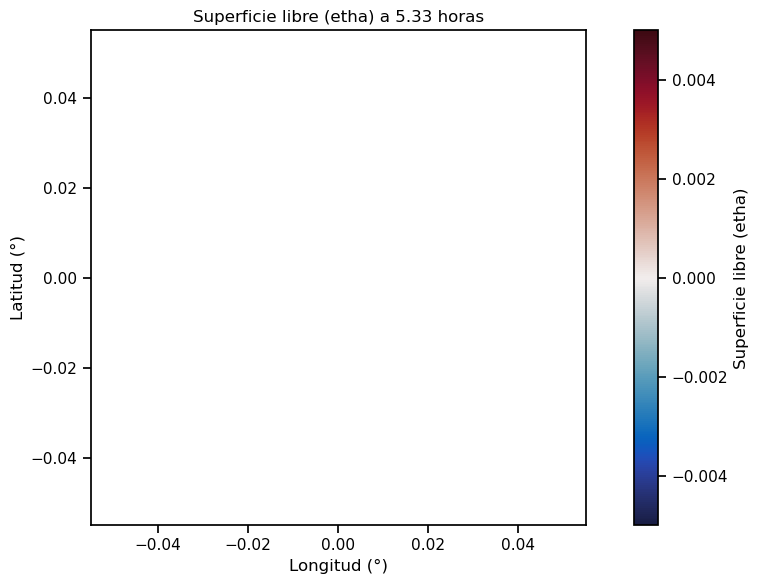

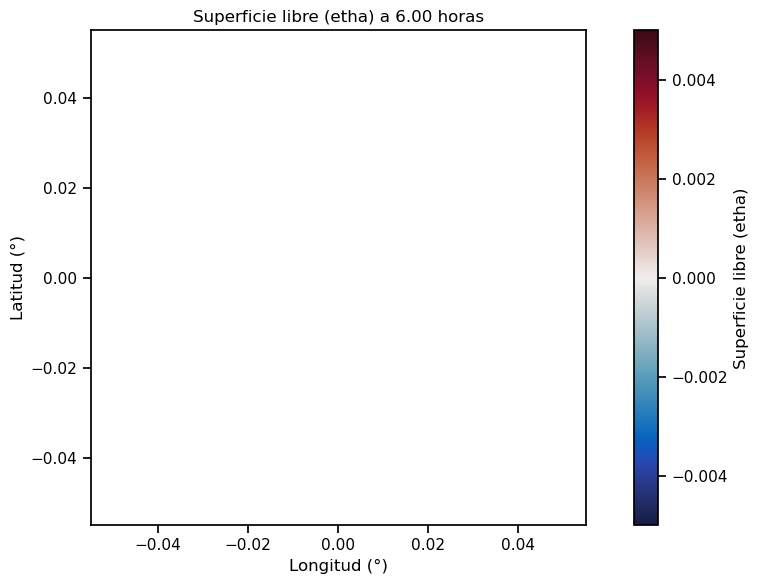

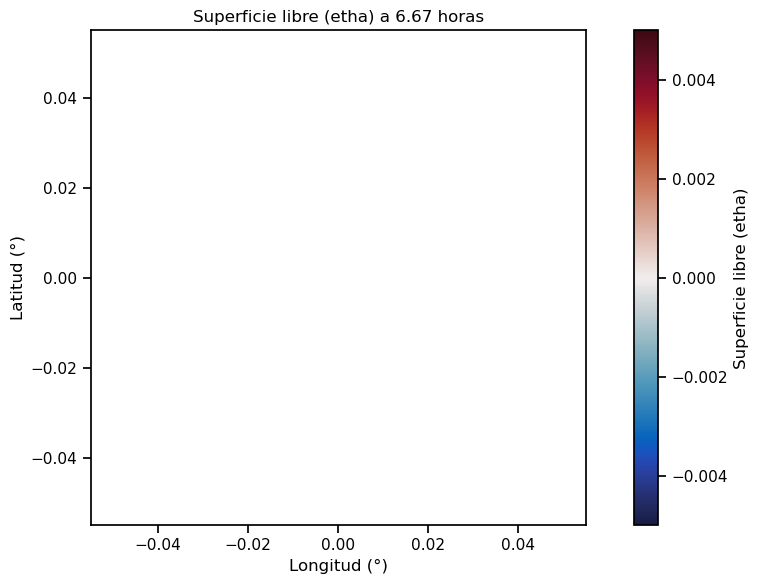

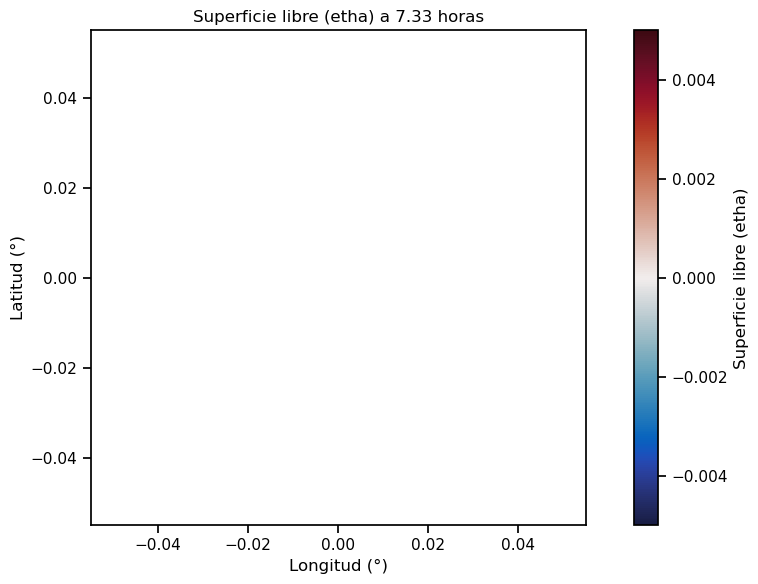

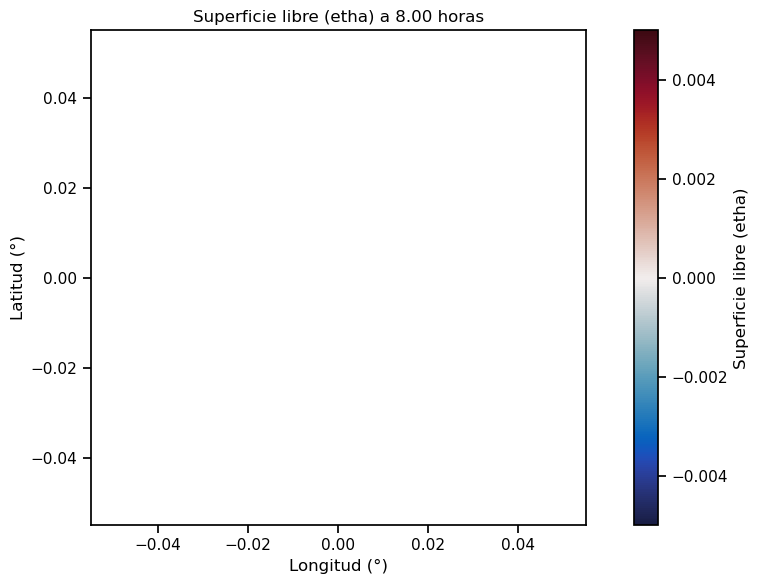

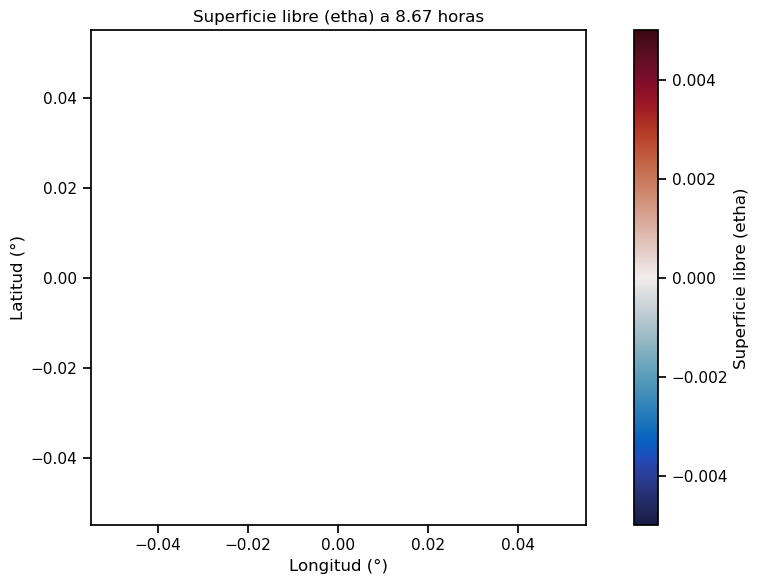

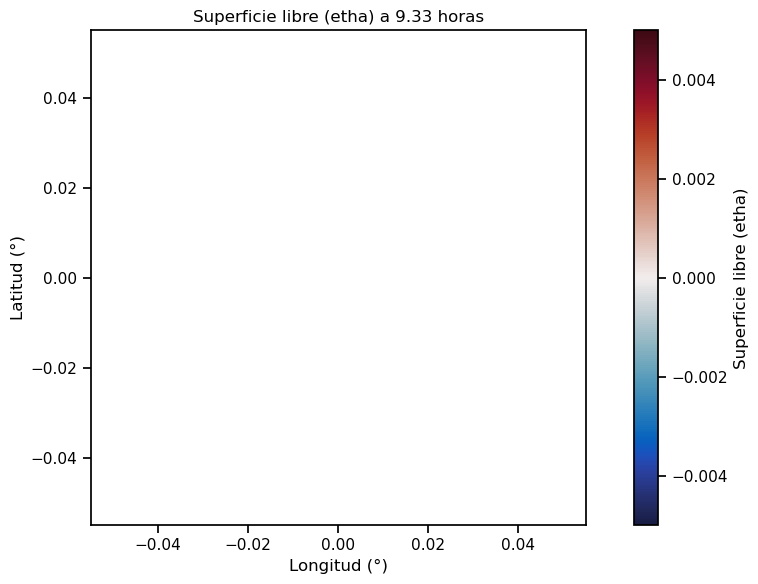

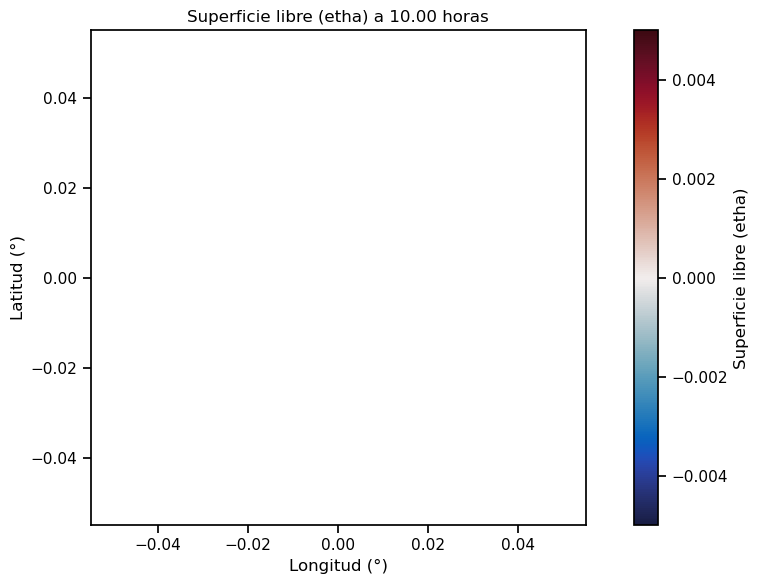

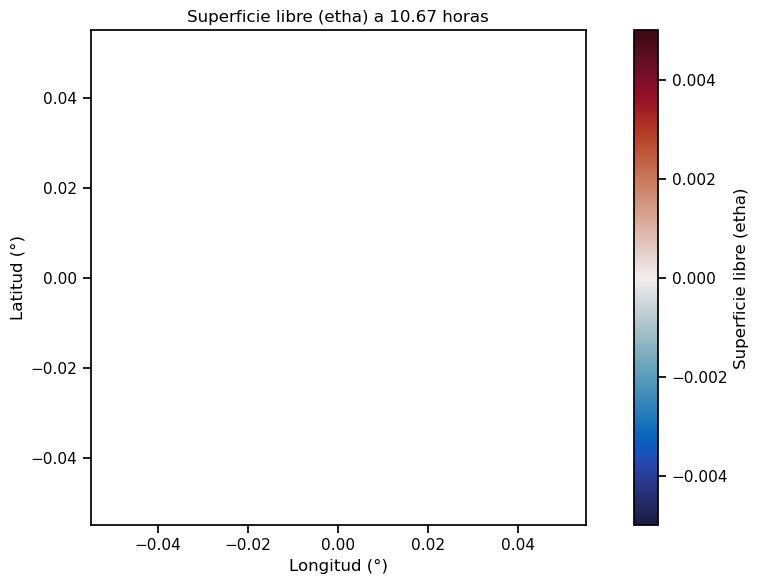

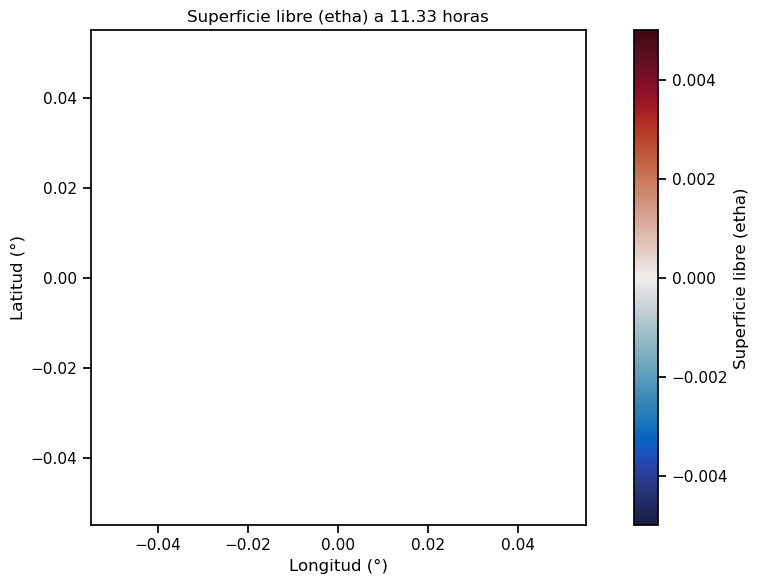

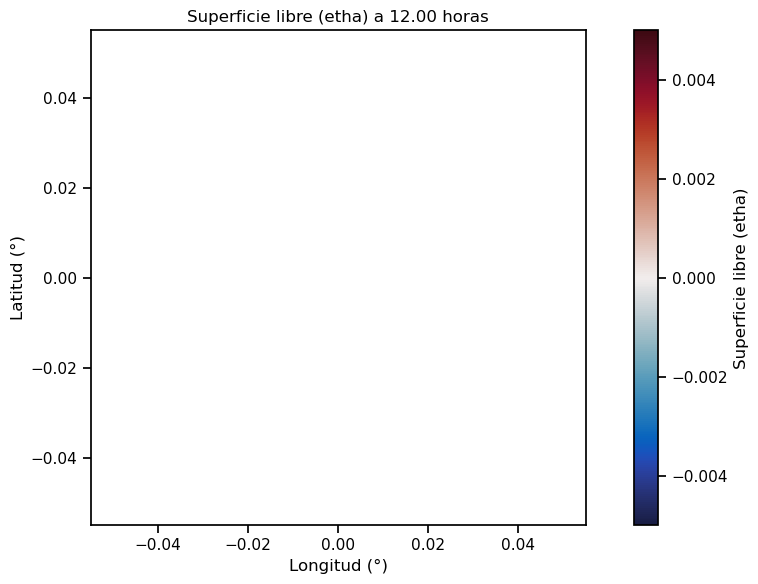

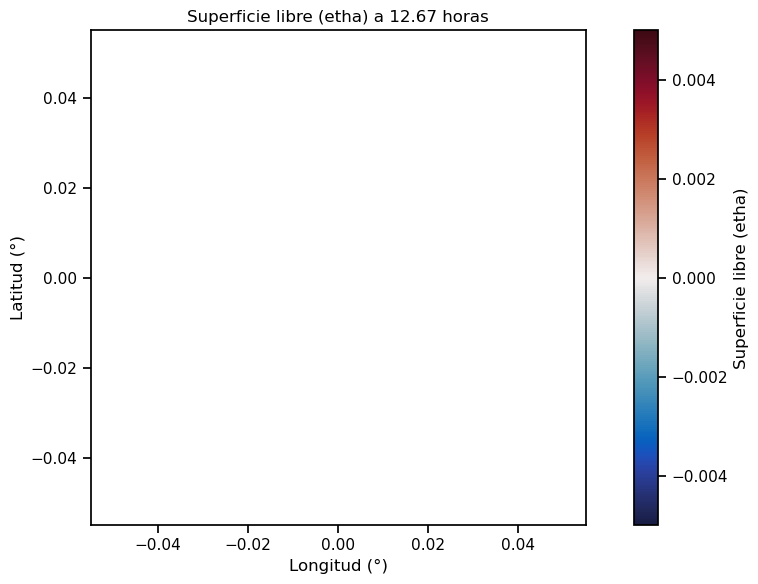

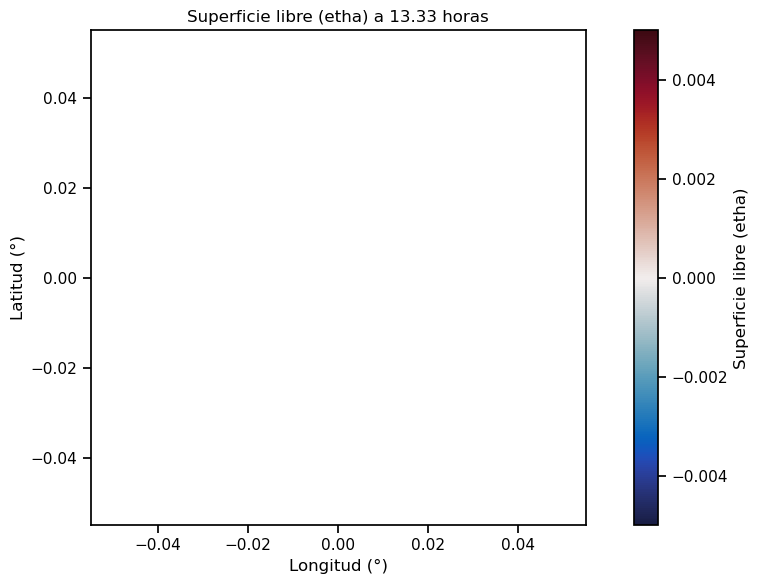

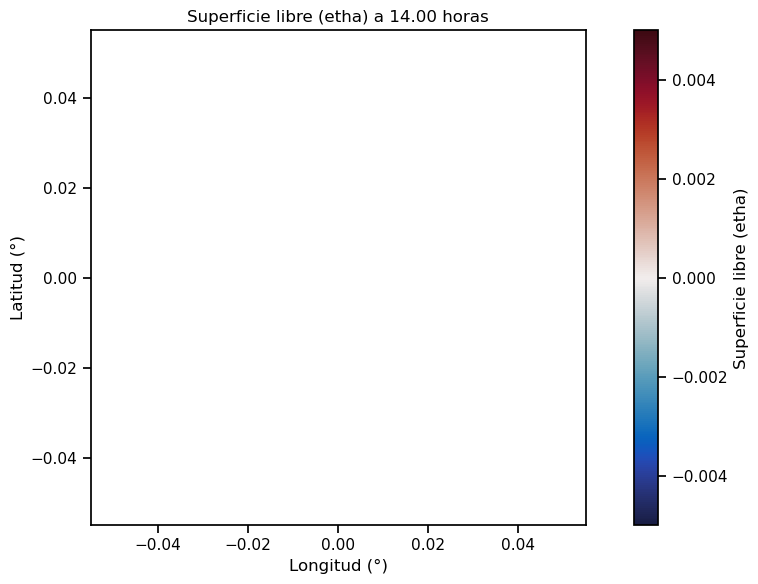

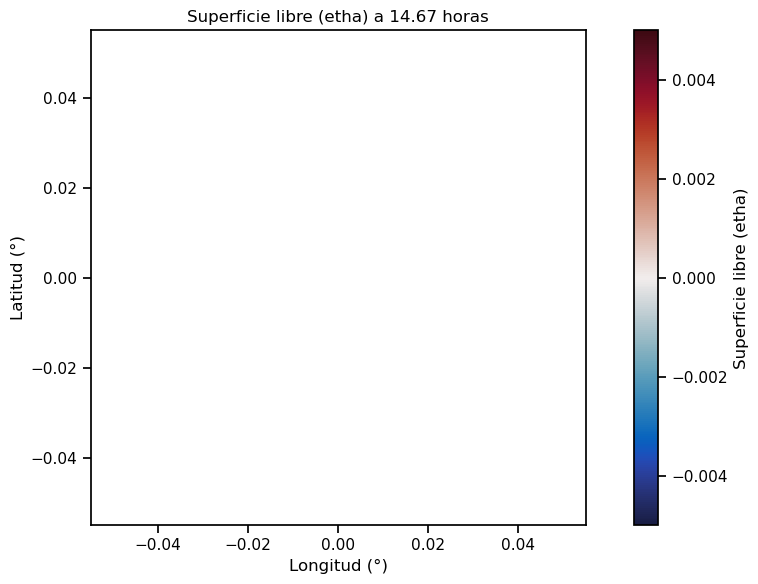

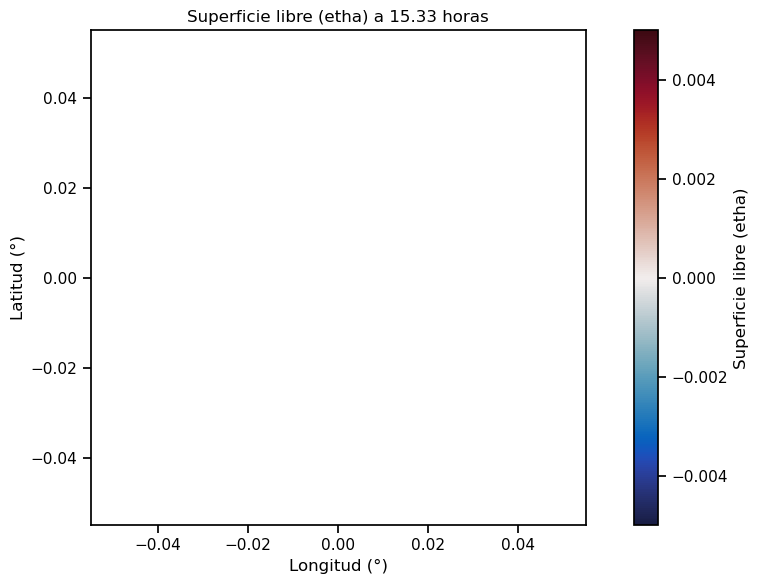

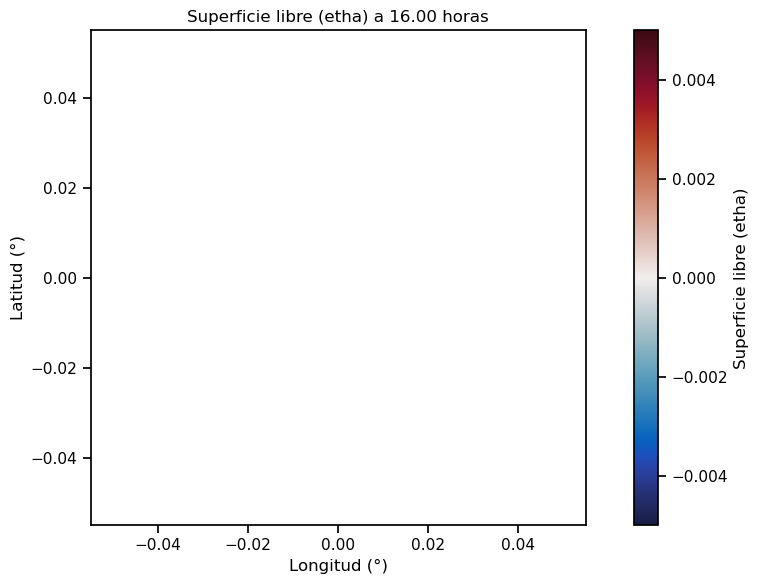

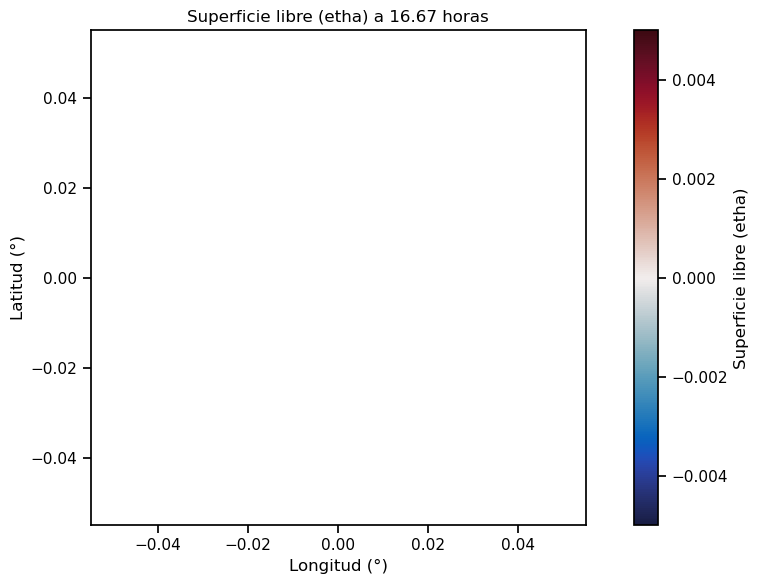

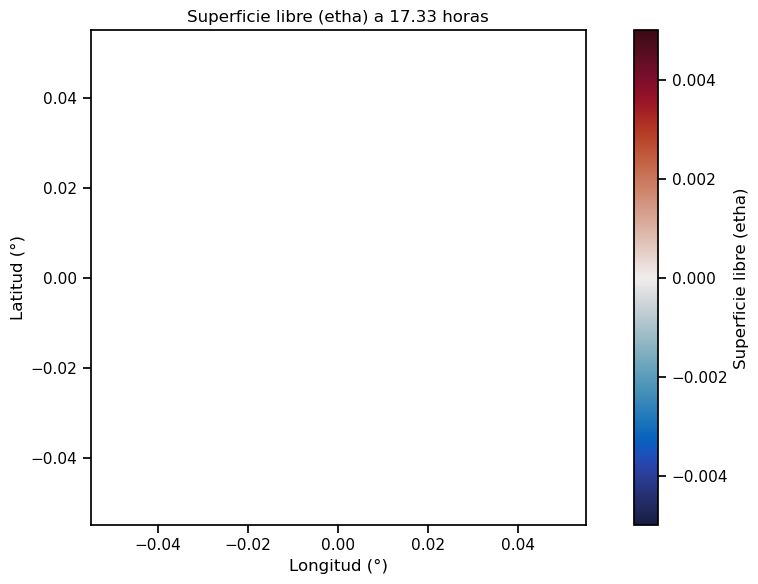

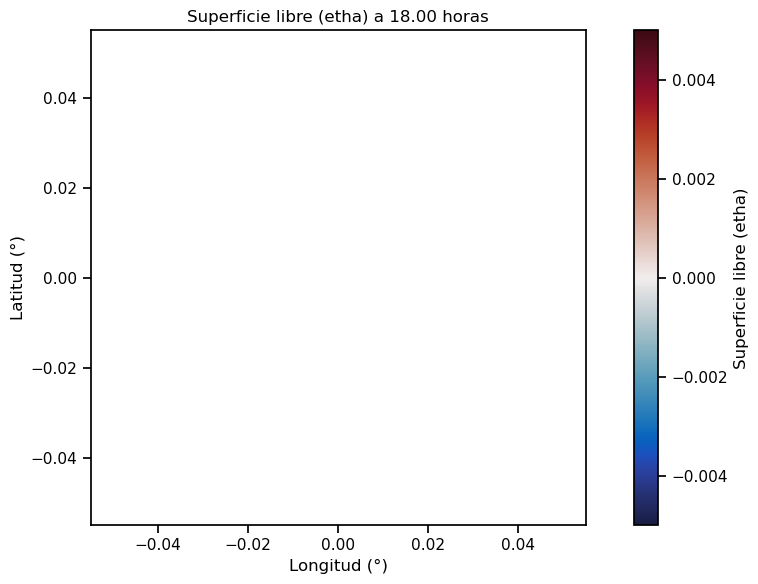

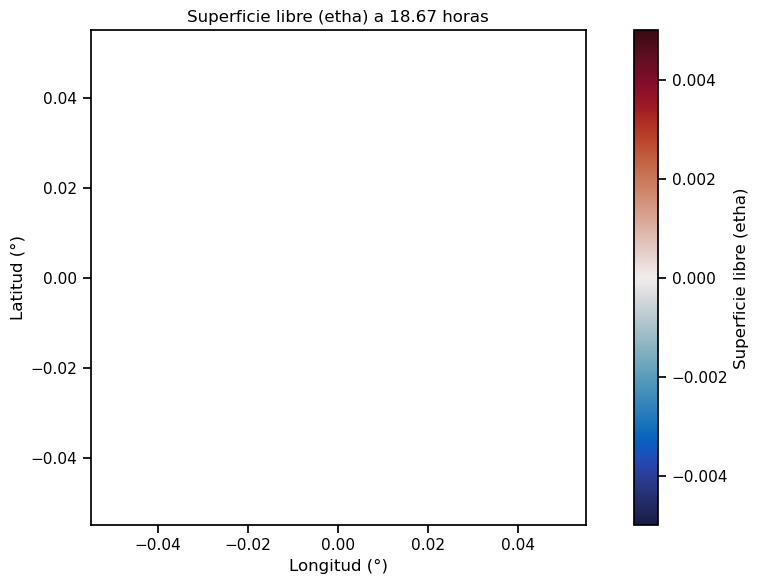

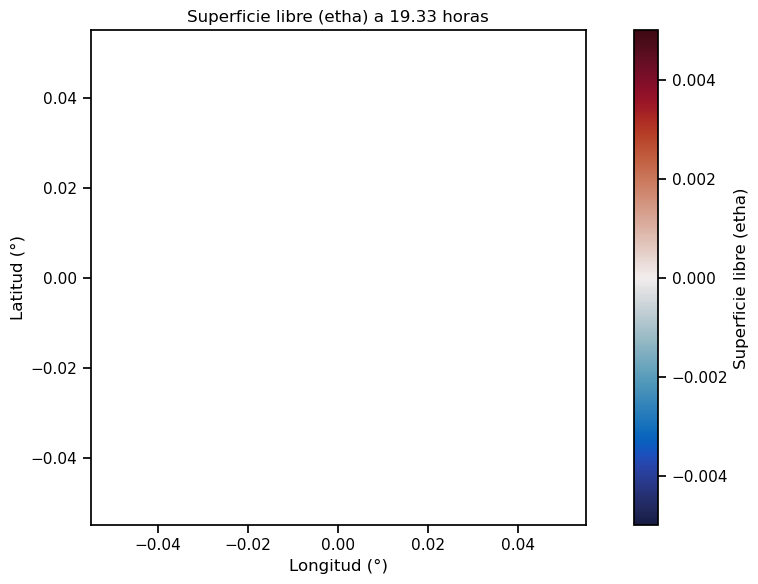

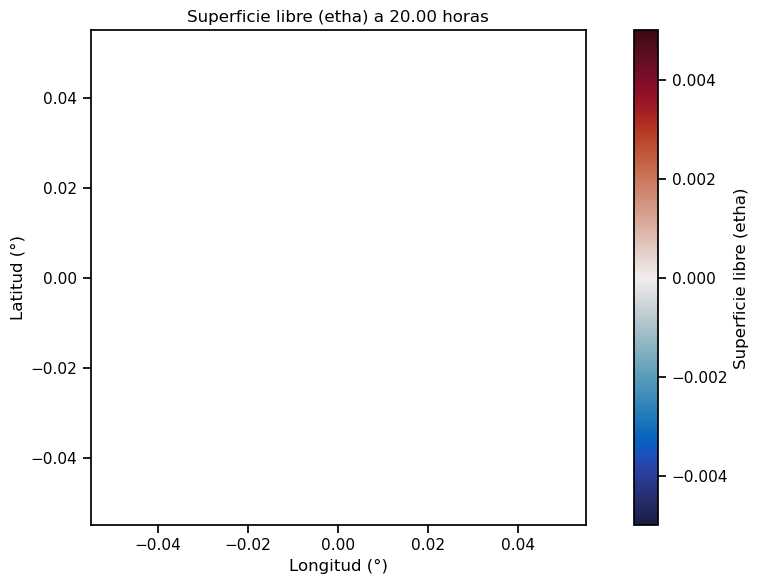

In [31]:
#Velocidad vertical (W) a los 222.40 m de profundidad.
#for tt in range(0,len(time),2):
#    W = nc.variables['W'][tt,25,:,:]
#   plt.pcolormesh(XC[0,:],YC[:,0],W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
#    plt.colorbar()
#    plt.title(f'time={time[tt]/3600} h')
#    plt.show()

# Iterar sobre el tiempo en intervalos de 2
for tt in range(0, len(time), 2):
    Eta1 = nc.variables['Eta'][tt, :, :]# Velocidad vertical a la profundidad deseada
    Eta2 = nc2.variables['Eta'][tt, :, :]
    Eta = Eta1-Eta2
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
    mesh = ax.pcolormesh(XC[0, :], YC[:, 0], Eta, vmin=-0.005, vmax=0.005, cmap=cmo.cm.balance)
    fig.colorbar(mesh, ax=ax, label='Superficie libre (etha)')  # Etiqueta de la barra de colores
    ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
    ax.set_title(f'Superficie libre (etha) a {time[tt]/3600:.2f} horas')
    ax.set_xlabel('Longitud (°)')
    ax.set_ylabel('Latitud (°)')
    ax.set_aspect(1)  # Proporciones iguales en x e y
    plt.tight_layout()
    plt.show()

In [32]:
nc.variables['T'][:]

array([    0.,  1200.,  2400.,  3600.,  4800.,  6000.,  7200.,  8400.,
        9600., 10800., 12000., 13200., 14400., 15600., 16800., 18000.,
       19200., 20400., 21600., 22800., 24000., 25200., 26400., 27600.,
       28800., 30000., 31200., 32400., 33600., 34800., 36000., 37200.,
       38400., 39600., 40800., 42000., 43200., 44400., 45600., 46800.,
       48000., 49200., 50400., 51600., 52800., 54000., 55200., 56400.,
       57600., 58800., 60000., 61200., 62400., 63600., 64800., 66000.,
       67200., 68400., 69600., 70800., 72000.])

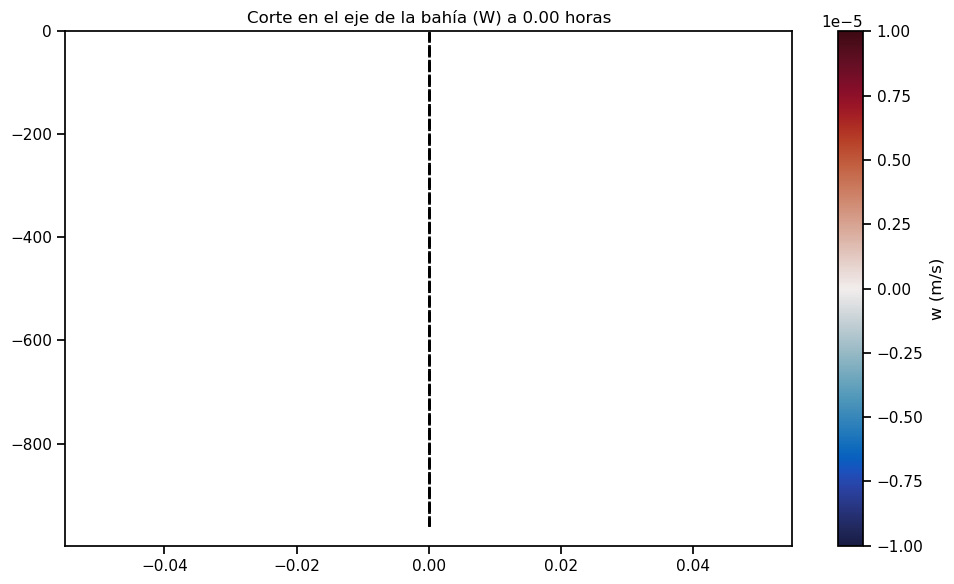

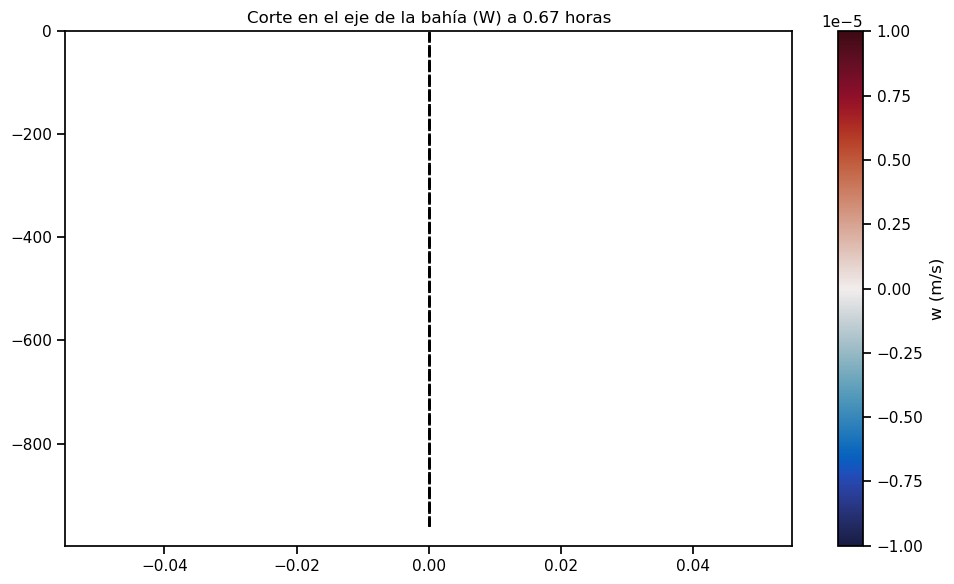

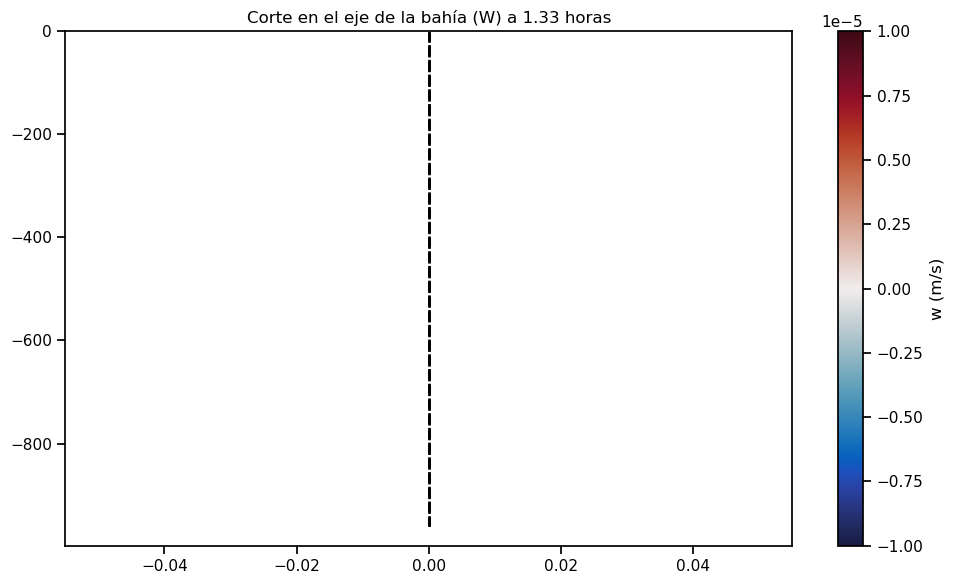

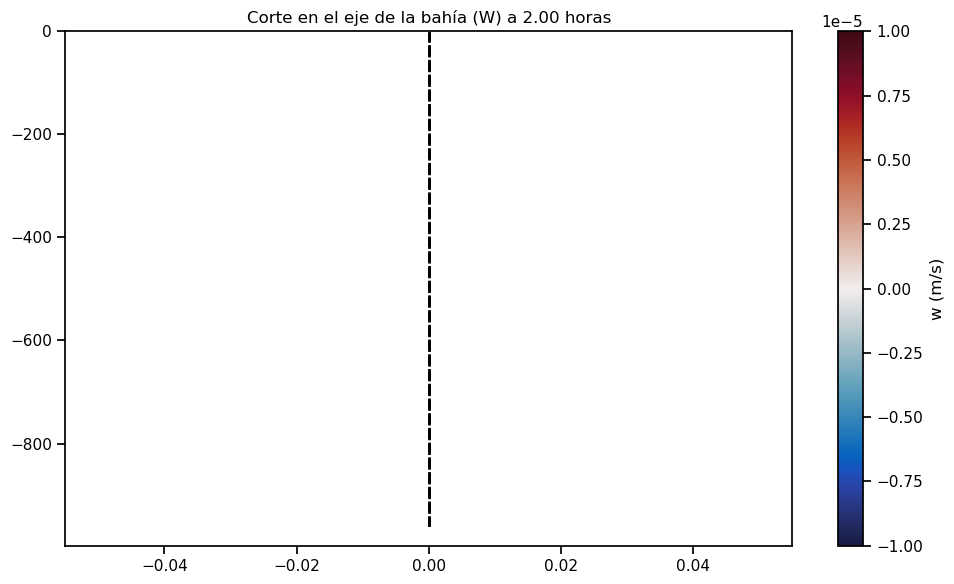

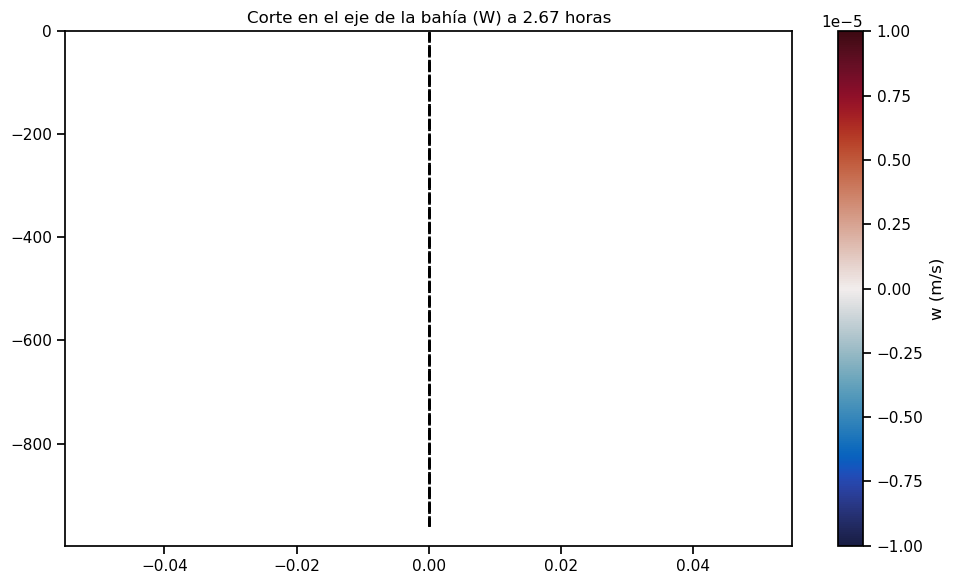

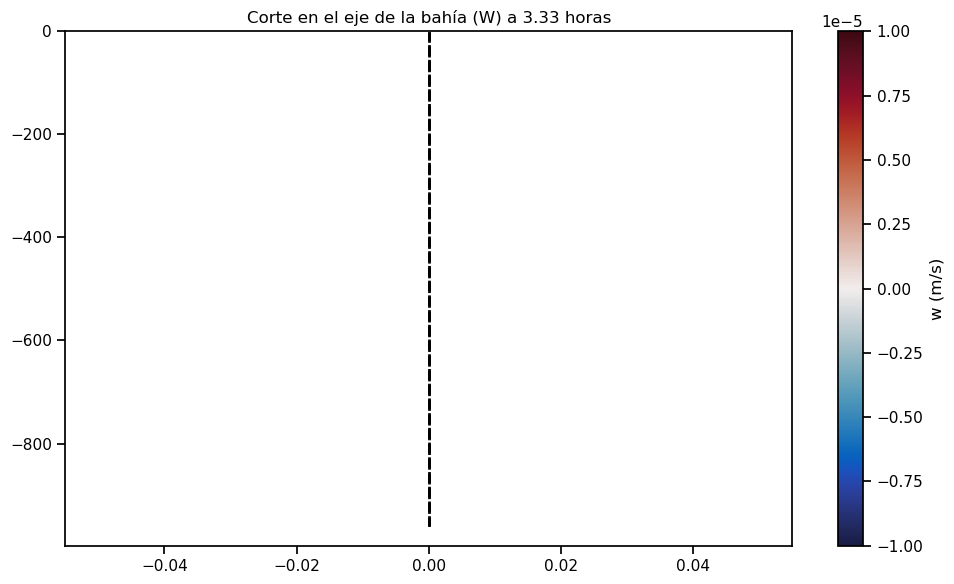

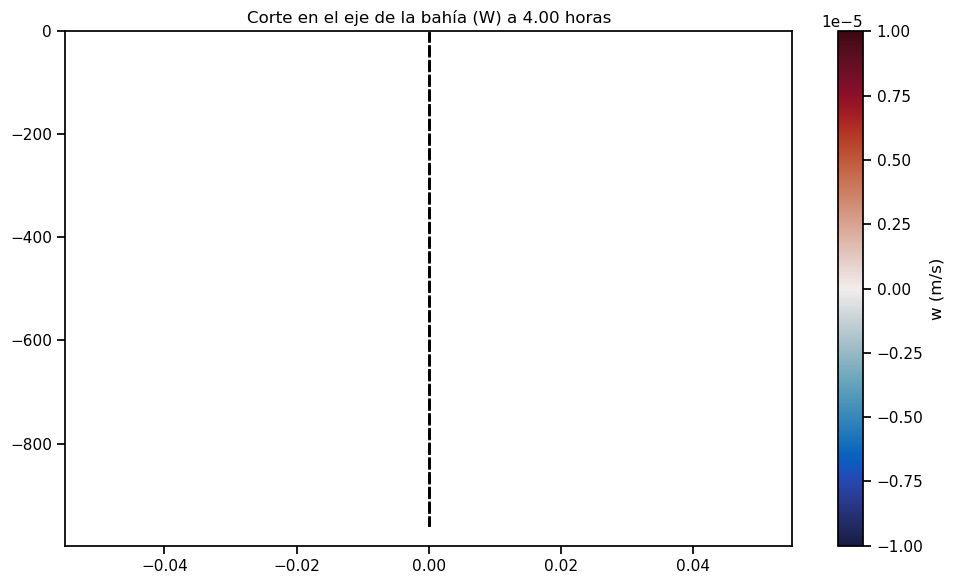

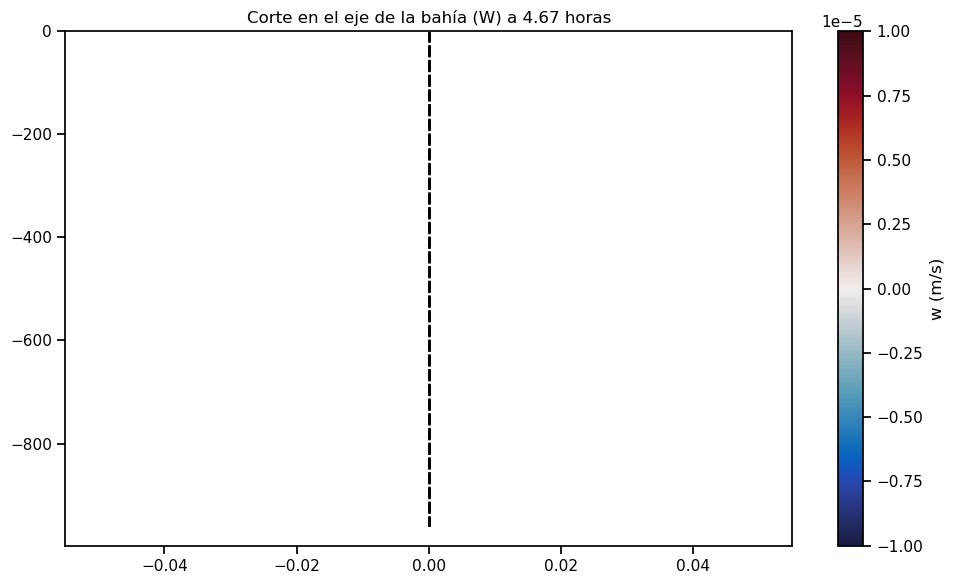

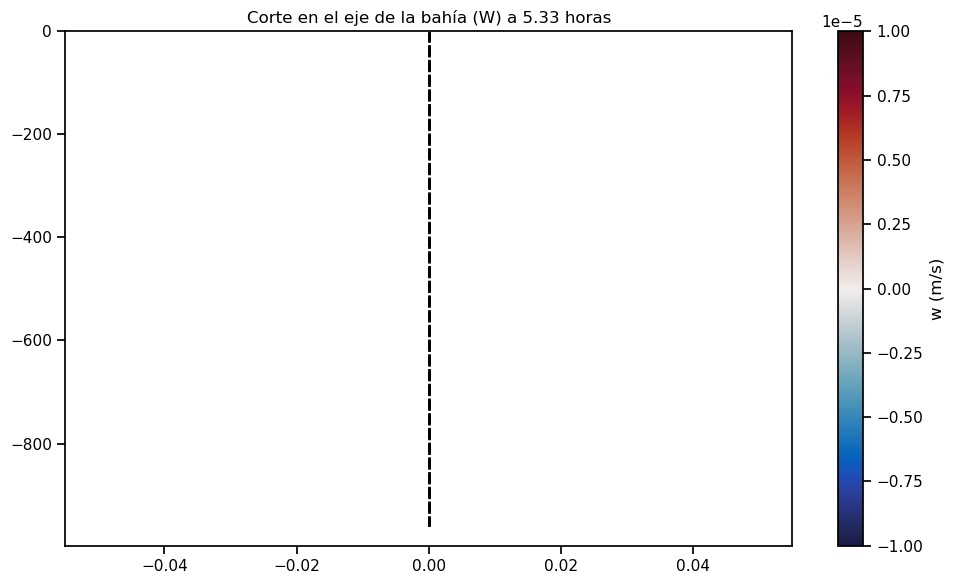

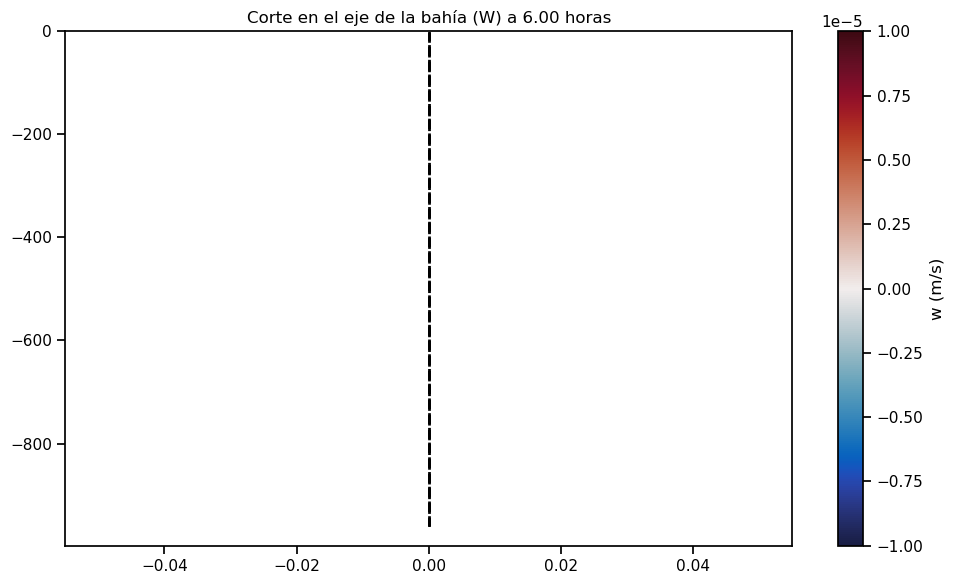

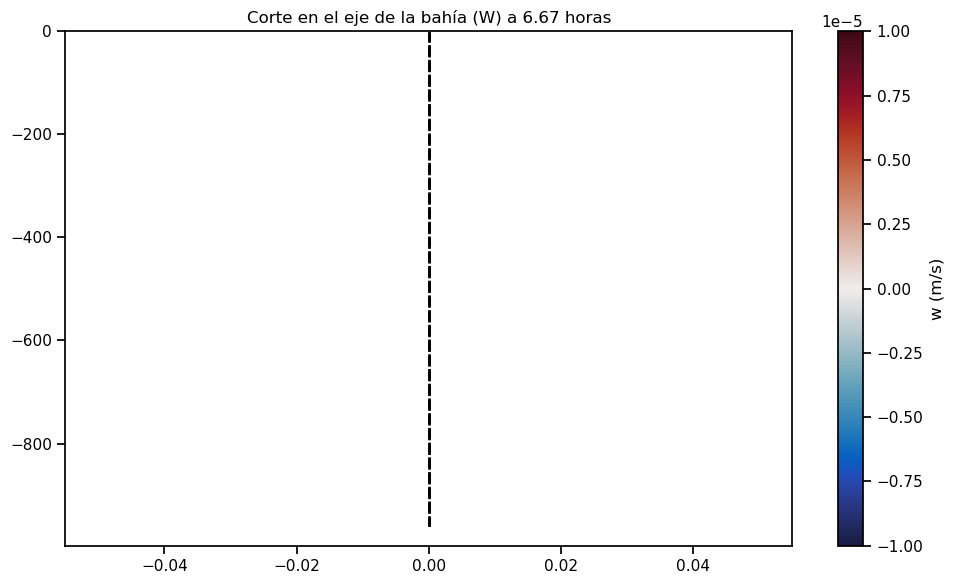

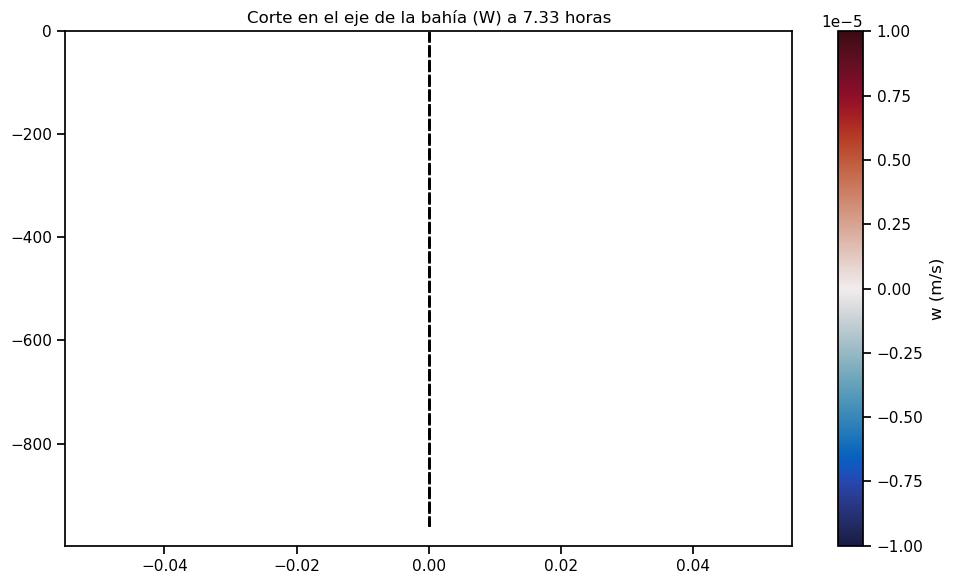

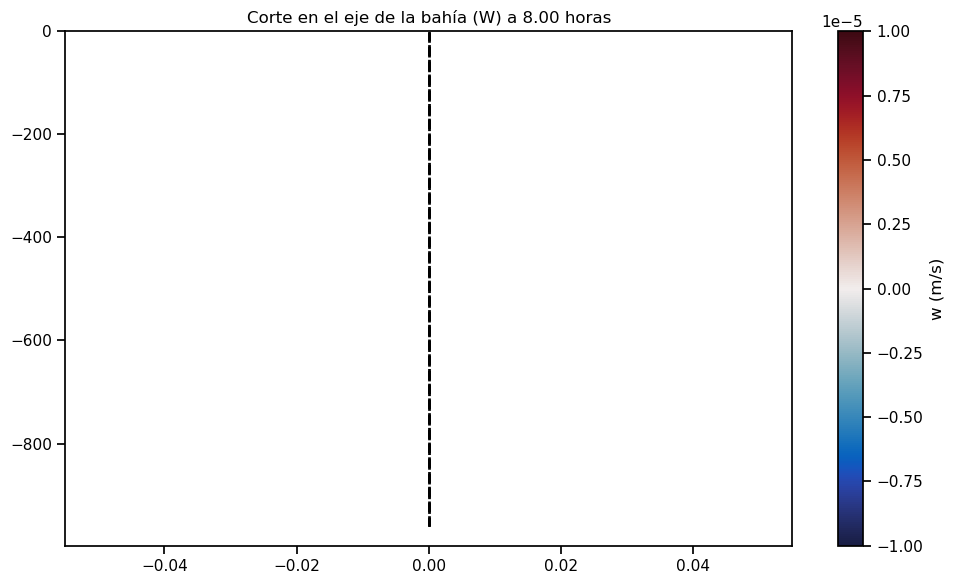

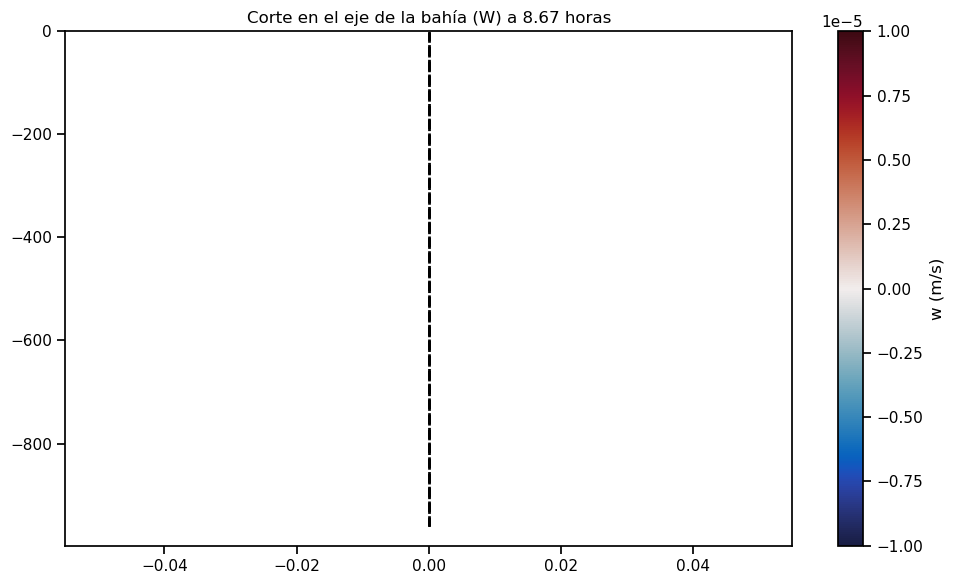

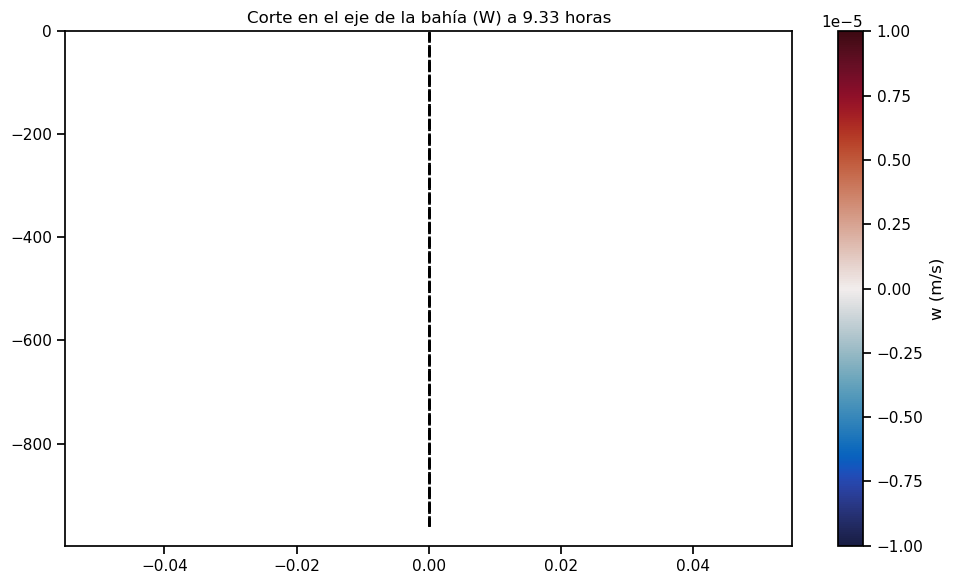

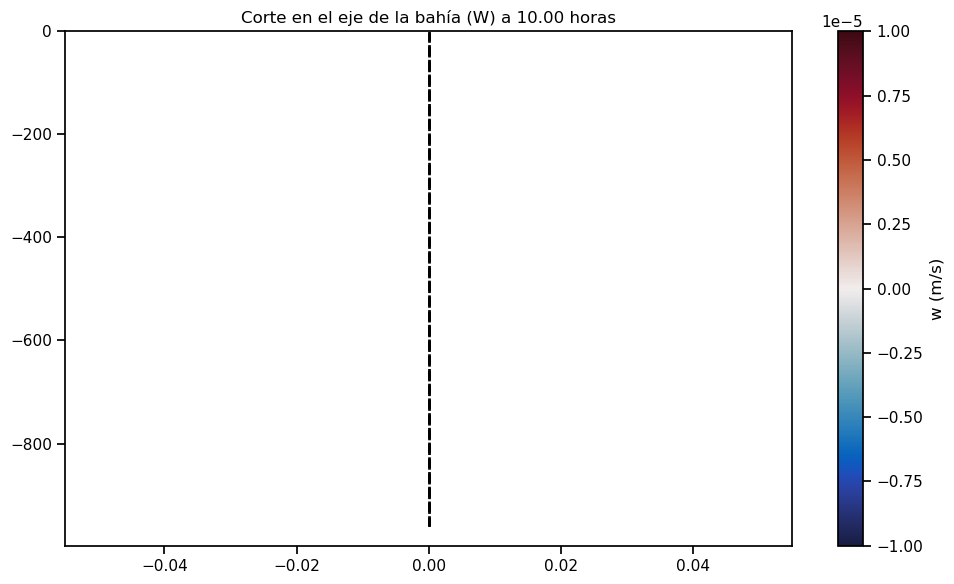

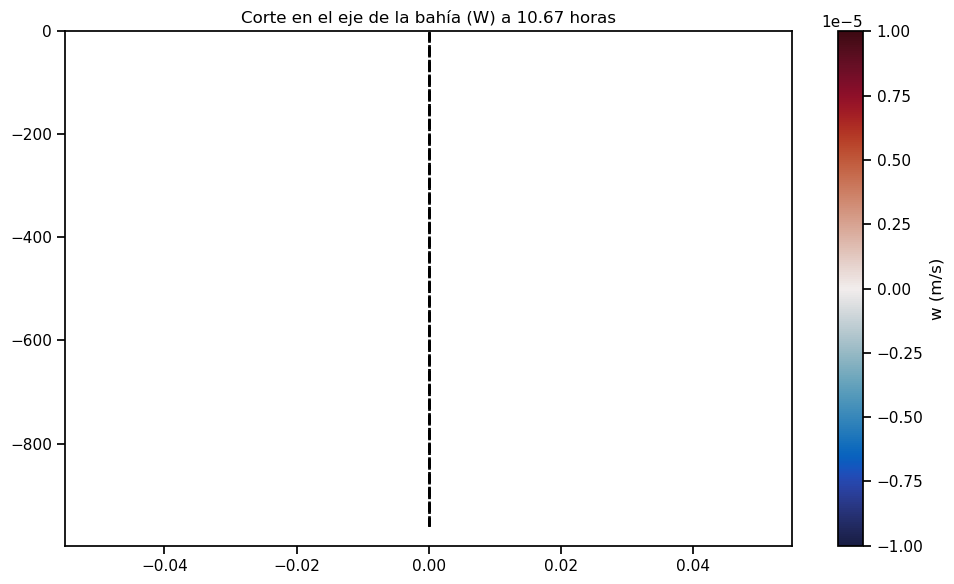

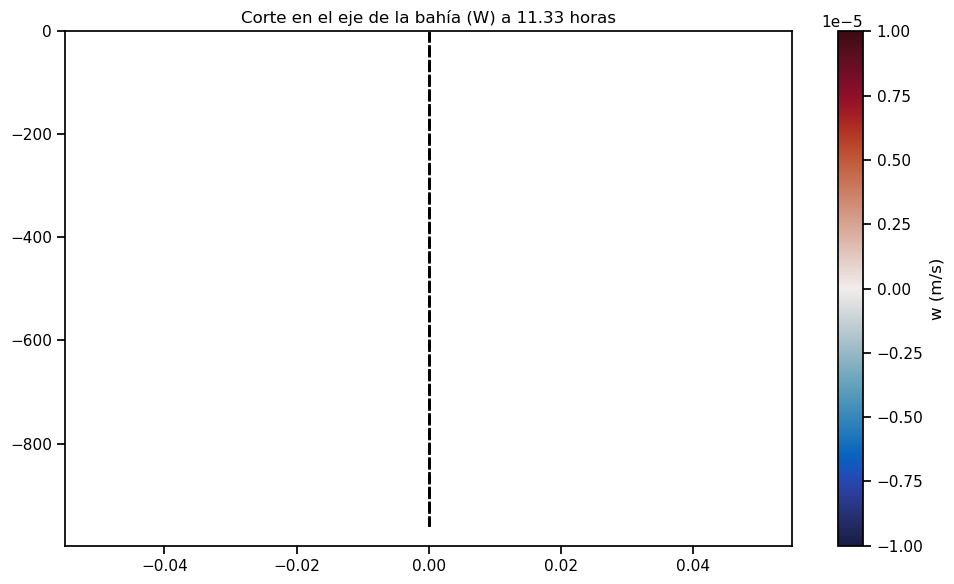

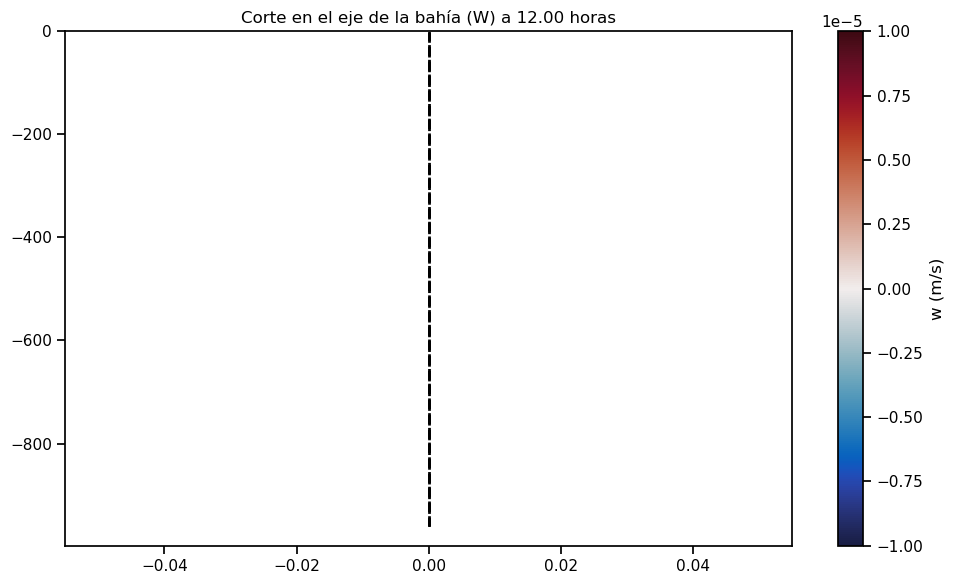

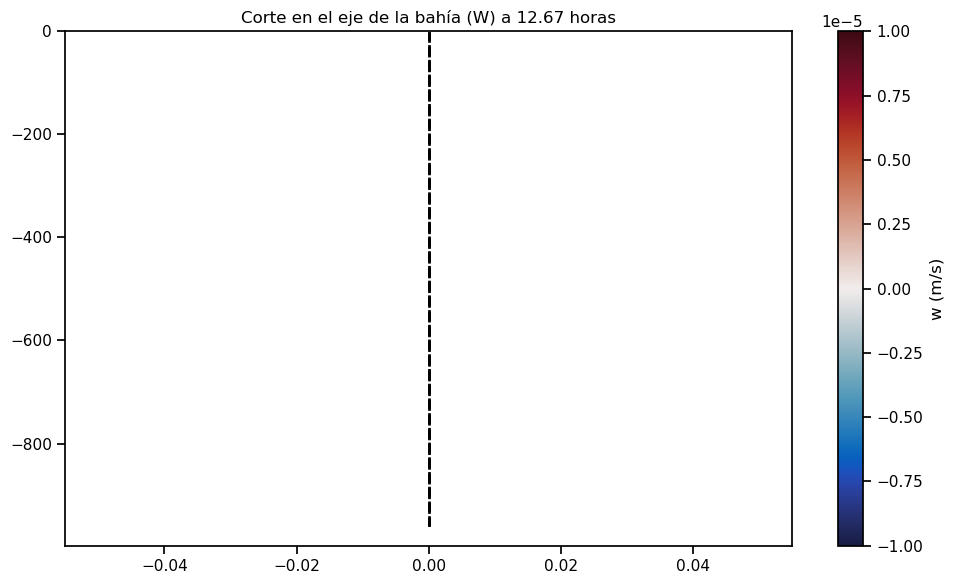

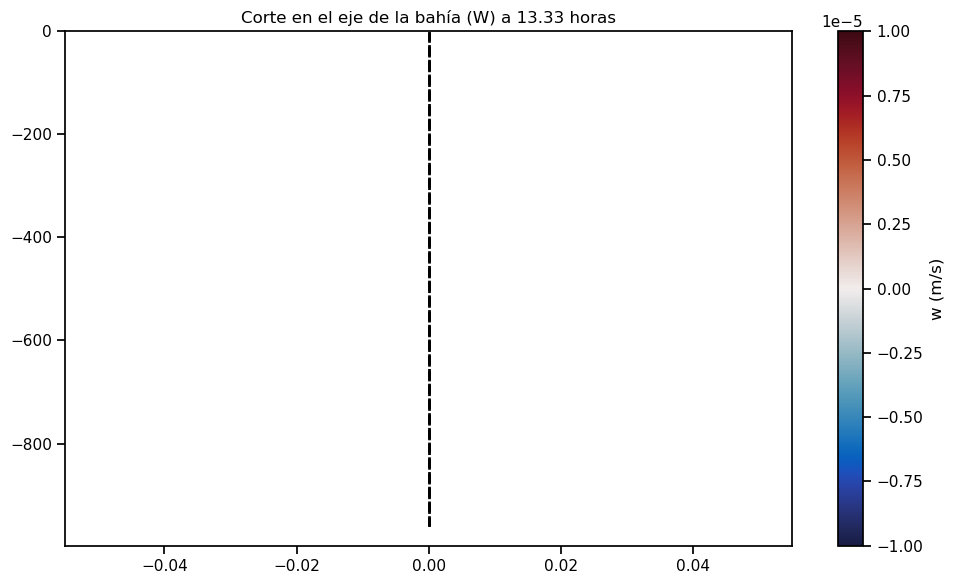

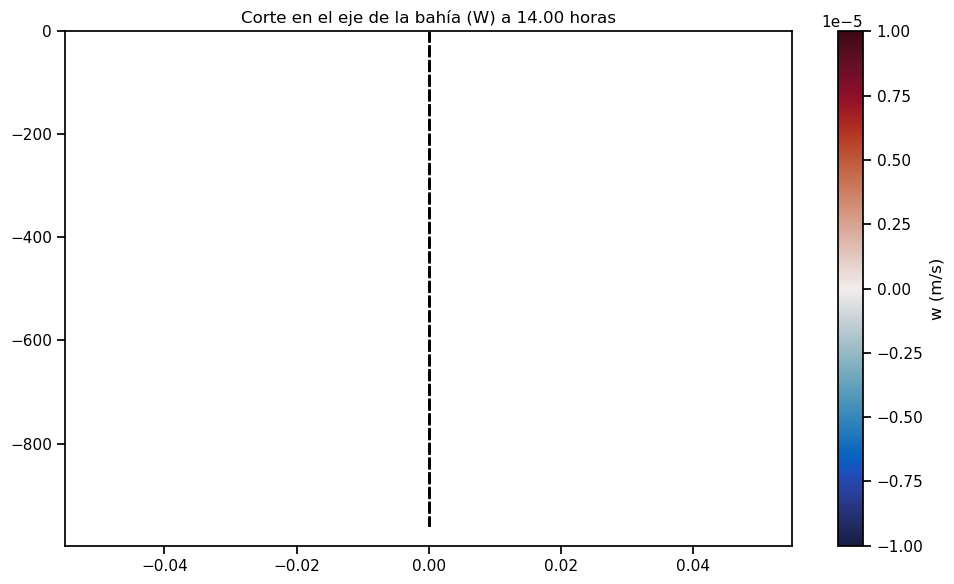

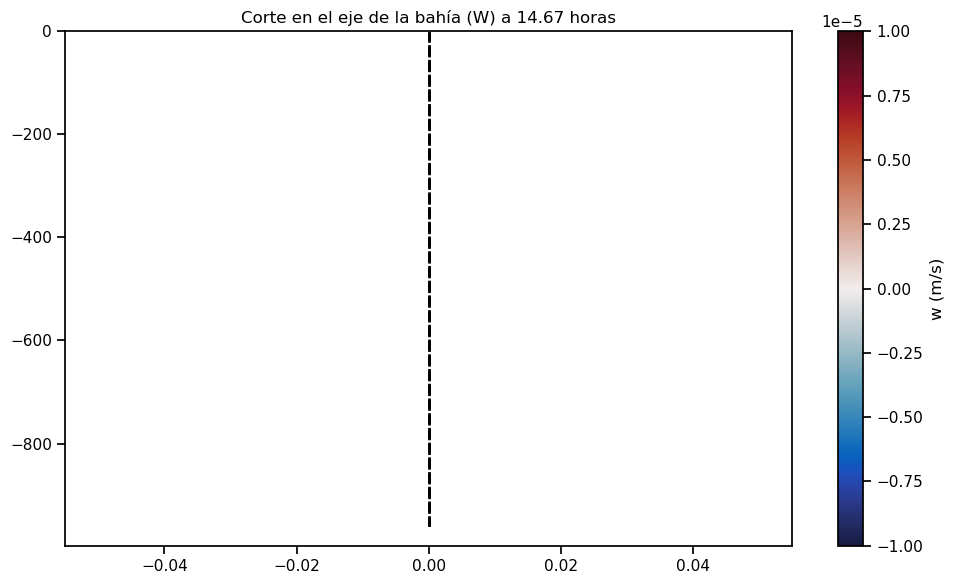

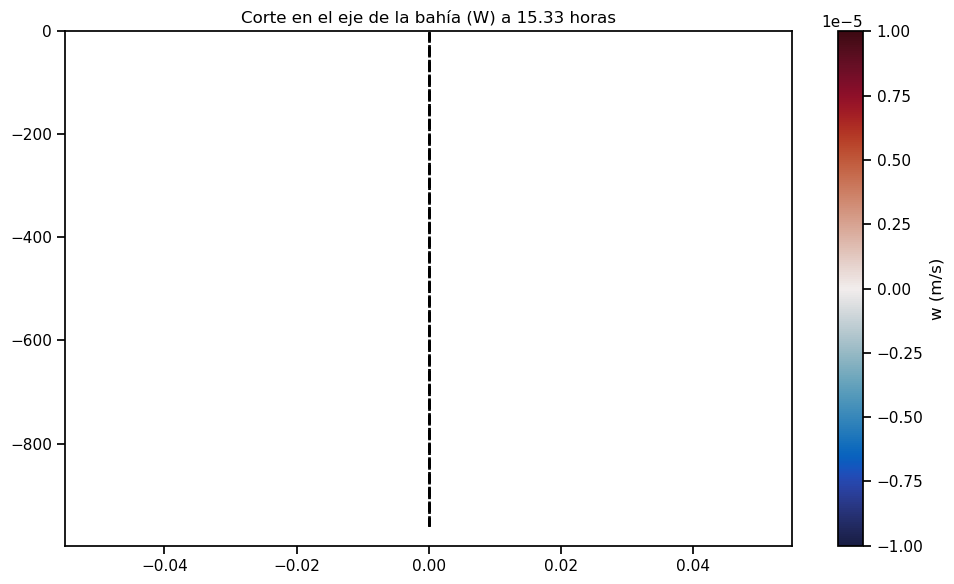

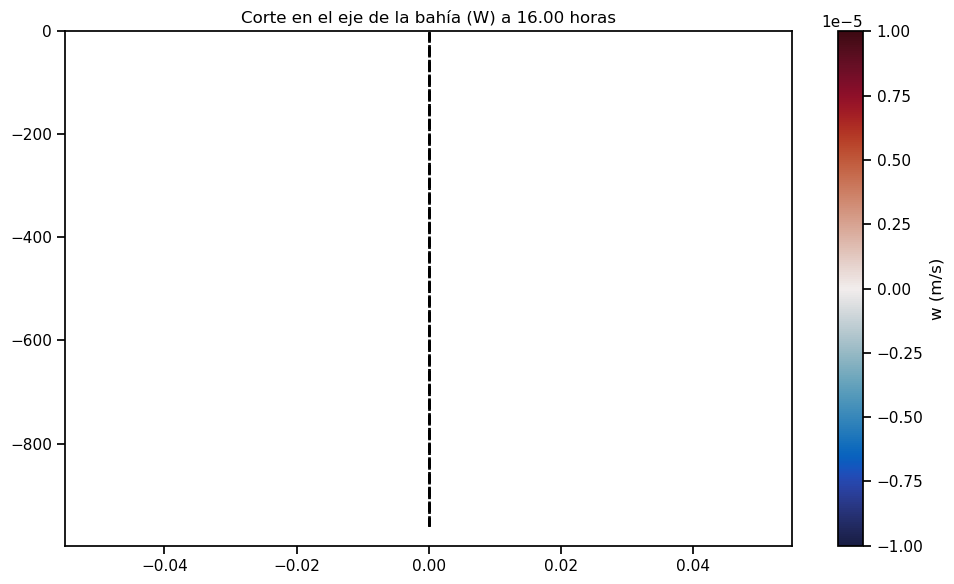

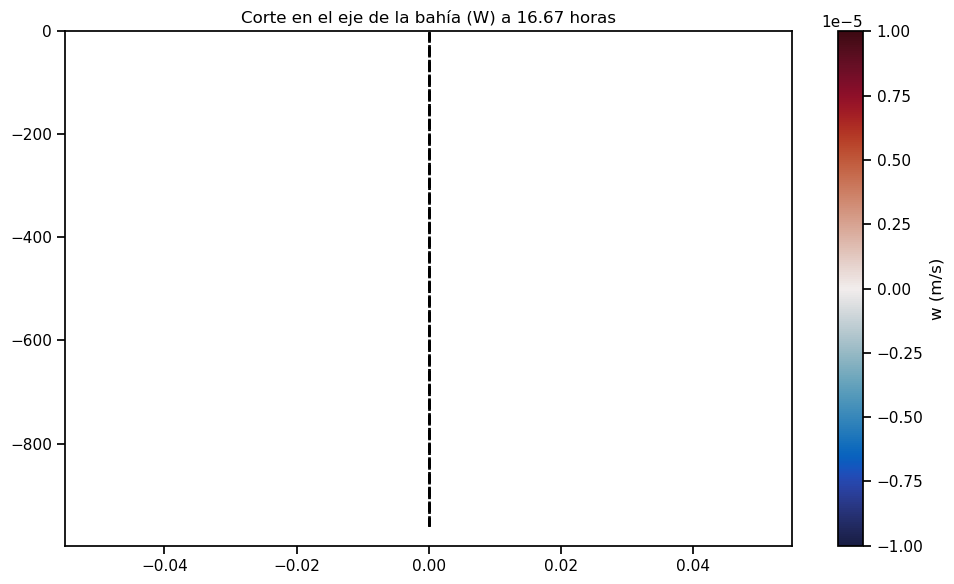

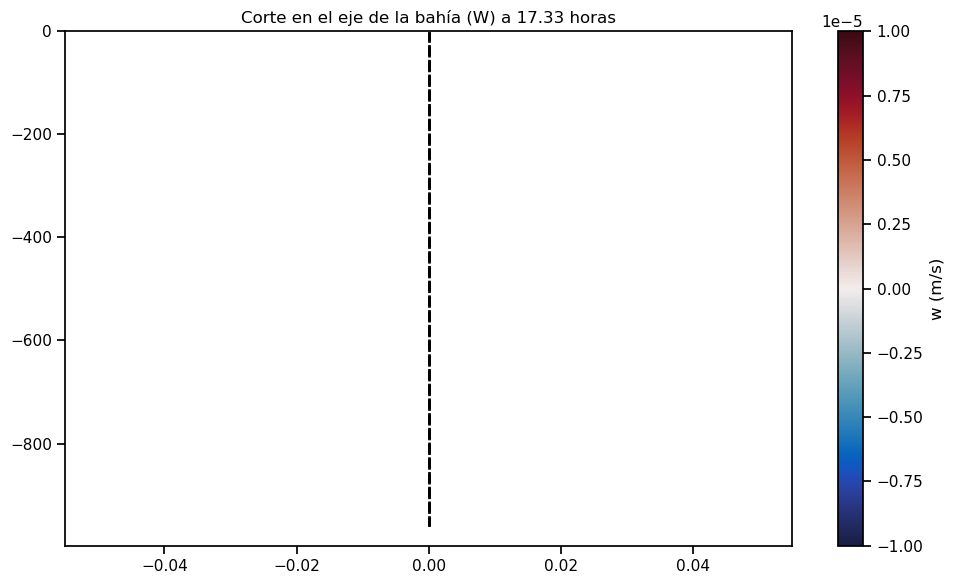

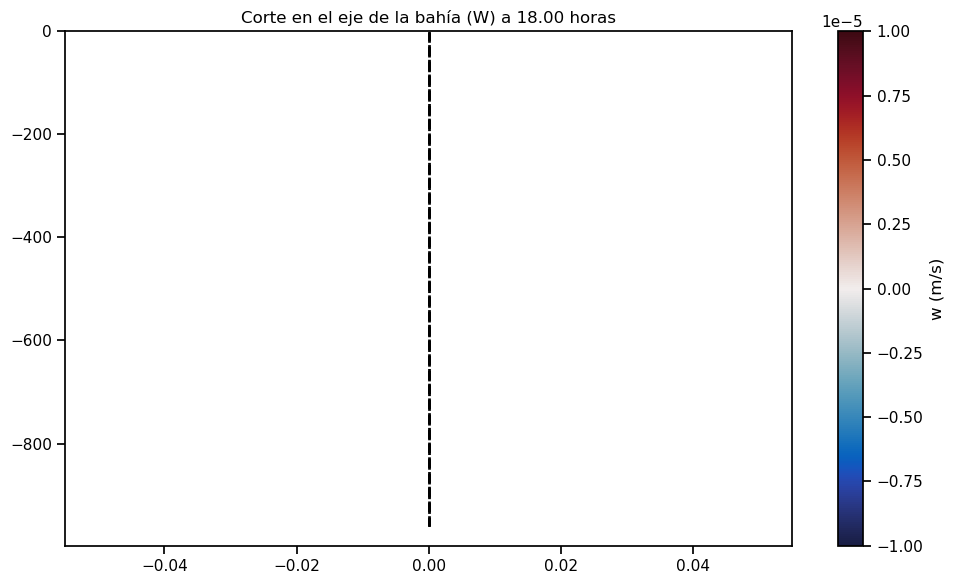

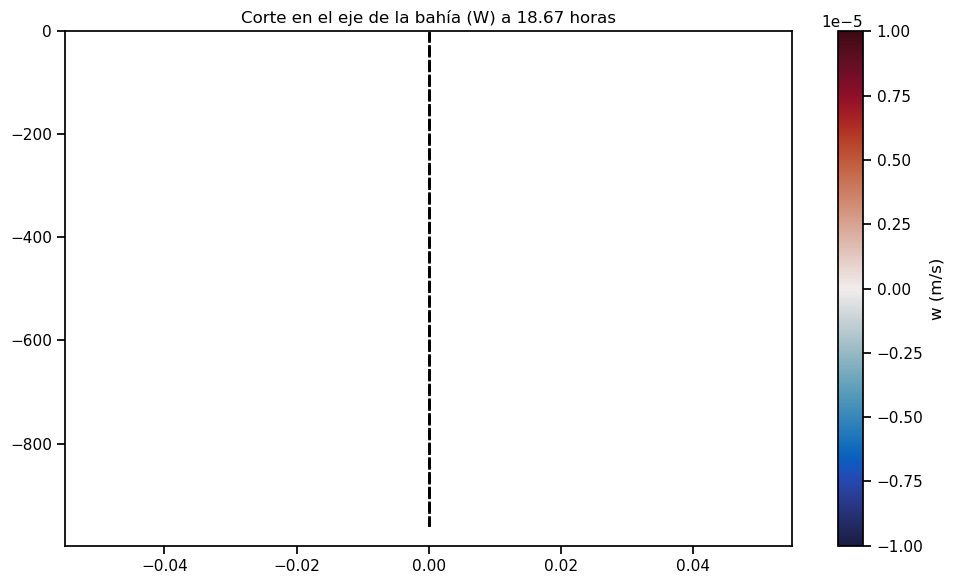

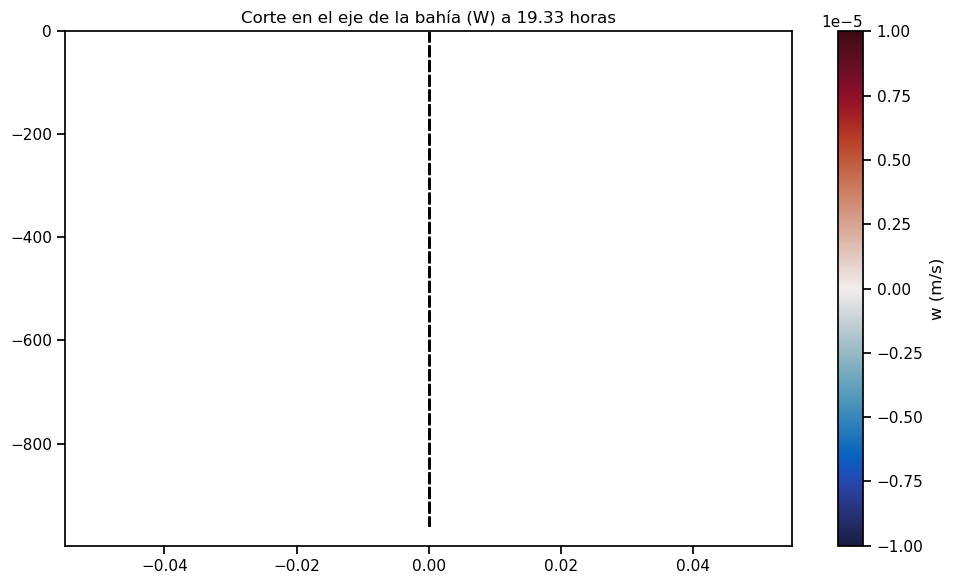

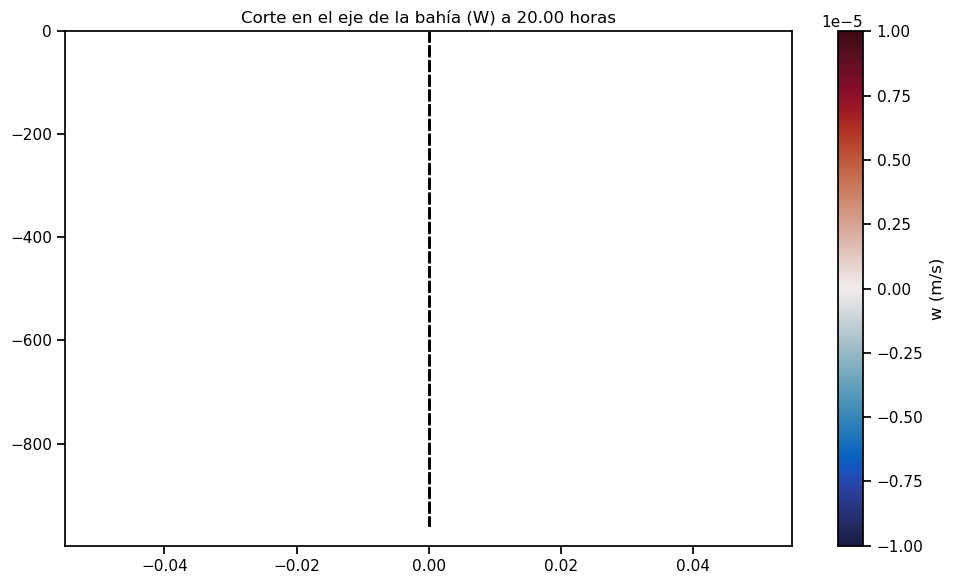

In [33]:
EjeXBay= int(272/2)

for tt in range(0, len(time), 2):
    
    W1 = nc.variables['W'][tt,:,:,EjeXBay]
    W2 = nc2.variables['W'][tt,:,:,EjeXBay]
    W = W1#-W2
    fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
    mesh = ax.pcolormesh(YC[:, 0],RC,W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
    ax.contour(YC[:, 0], RC, mask3D[:,:,EjeXBay], colors='black', linewidths=2, linestyles='--')
    fig.colorbar(mesh, ax=ax, label='w (m/s)')  # Etiqueta de la barra de colores
    ax.set_title(f'Corte en el eje de la bahía (W) a {time[tt]/3600:.2f} horas')
    #ax.set_aspect(1)
    plt.tight_layout()
    plt.show()



# Animaciones

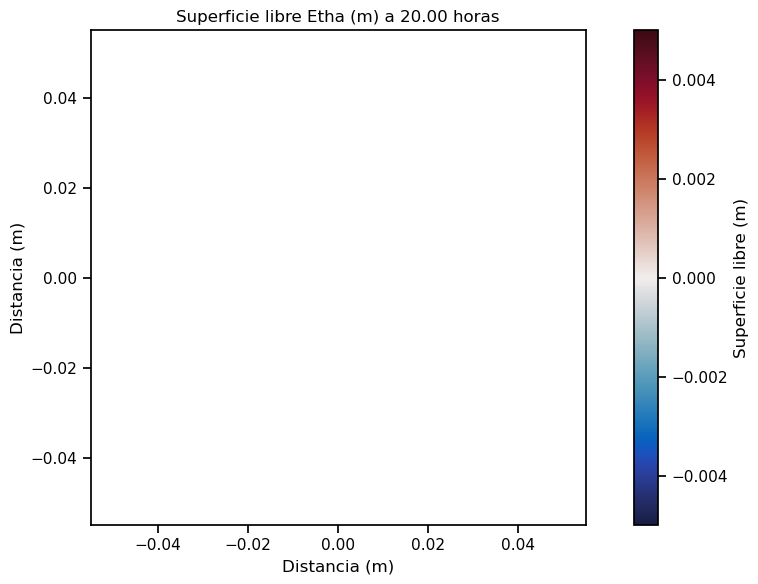

In [34]:
### ANIMATION ETHA:JUST RUN WITH BAY

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo

Eta = nc.variables['Eta'][1, :, :]  # Superficie libre a lo largo del tiempo

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(Eta), 
                     vmin=-0.005, vmax=0.005, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Superficie libre (m)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Superficie libre Eta (m)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    Eta1 = nc.variables['Eta'][tt, :, :]# Velocidad vertical a la profundidad deseada
    Eta2 = nc2.variables['Eta'][tt, :, :]
    Eta = Eta1
    mesh.set_array(Eta.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Superficie libre Etha (m) a {time[tt] / 3600:.2f} horas")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationEtha1_Nr30.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

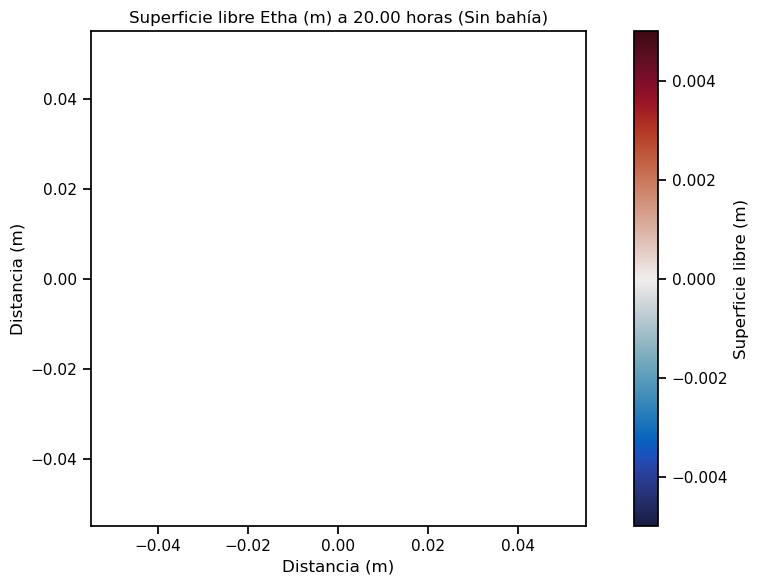

In [35]:
### ANIMATION ETHA: RUN WITH BAY - RUN WITHOUT BAY

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(Eta), 
                     vmin=-0.005, vmax=0.005, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Superficie libre (m)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Superficie libre Eta (m)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    Eta1 = nc.variables['Eta'][tt, :, :]# Velocidad vertical a la profundidad deseada
    Eta2 = nc2.variables['Eta'][tt, :, :]
    Eta = Eta2
    mesh.set_array(Eta.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Superficie libre Etha (m) a {time[tt] / 3600:.2f} horas (Sin bahía)")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationEtha_diff1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

In [36]:
W.shape
W = nc.variables['W'][0,9,:,:]

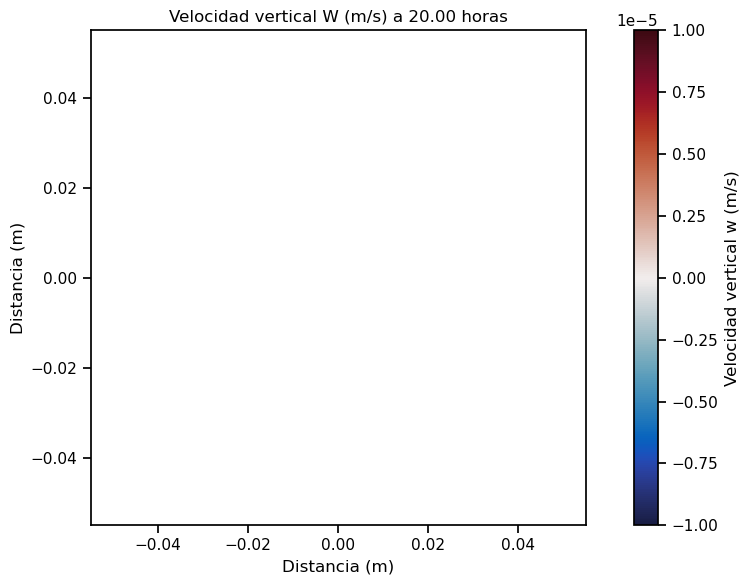

In [37]:
### ANIMATION W:JUST RUN WITH BAY

W= nc.variables['W'][tt, 25, :, :]
W.shape

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(W), 
                     vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Velocidad vertical w (m/s)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Velocidad vertical w (m/s)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    W1 = nc.variables['W'][tt, 25, :, :]  # Velocidad vertical a la profundidad deseada con bahia
    W2 = nc2.variables['W'][tt, 25, :, :]  #Sin bahia
    W = W1#-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Velocidad vertical W (m/s) a {time[tt] / 3600:.2f} horas")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationW1_Nr30.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

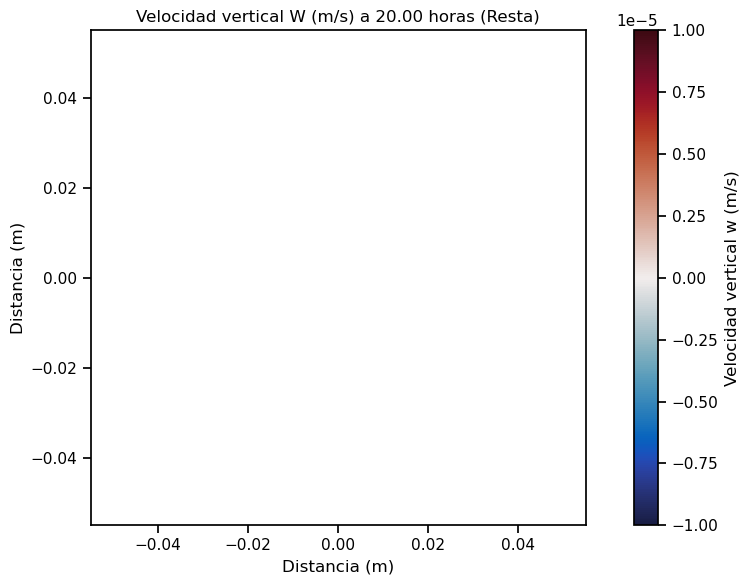

In [38]:
### ANIMATION W: RUN WITH BAY -WITHOUT BAY

W= nc.variables['W'][tt, 25, :, :]
W.shape

# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))
mesh = ax.pcolormesh(XC[0, :], YC[:, 0], np.zeros_like(W), 
                     vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
cb = fig.colorbar(mesh, ax=ax, label='Velocidad vertical w (m/s)')
ax.contour(XC[0, :], YC[:, 0], mask, colors='black', linewidths=2, linestyles='--')
ax.set_title("Velocidad vertical w (m/s)")
ax.set_xlabel("Distancia (m)")
ax.set_ylabel("Distancia (m)")
ax.set_aspect(1)
plt.tight_layout()

# Función de actualización para la animación
def update(tt):
    W1 = nc.variables['W'][tt, 25, :, :]  # Velocidad vertical a la profundidad deseada con bahia
    W2 = nc2.variables['W'][tt, 25, :, :]  #Sin bahia
    W = W1-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"Velocidad vertical W (m/s) a {time[tt] / 3600:.2f} horas (Resta)")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationW_diff1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 

In [39]:
W = nc.variables['W'][tt, :, :, 136] 

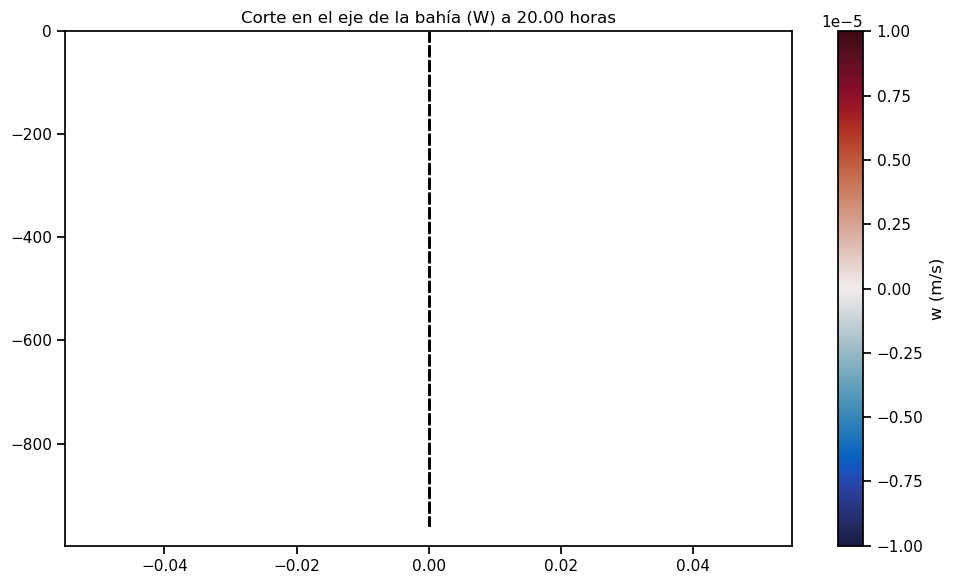

In [40]:
### ANIMATION PERFIL W:JUST RUN WITH BAY

W = nc.variables['W'][tt,:,:,EjeXBay] 

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo
# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
mesh = ax.pcolormesh(YC[:, 0],RC,W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
ax.contour(YC[:, 0], RC, mask3D[:,:,EjeXBay], colors='black', linewidths=2, linestyles='--')
fig.colorbar(mesh, ax=ax, label='w (m/s)')  # Etiqueta de la barra de colores
ax.set_title(f'Corte en el eje de la bahía (W) a {time[tt]/3600:.2f} horas')
#ax.set_aspect(1)
plt.tight_layout()
plt.show()

# Función de actualización para la animación
def update(tt):
    EjeXBay= int(272/2)
    W1 = nc.variables['W'][tt,:,:,EjeXBay]
    W2 = nc2.variables['W'][tt,:,:,EjeXBay]
    W = W1#-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"f'Corte en el eje de la bahía (W) a {time[tt] / 3600:.2f} horas")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationWperfil1_Nr50.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 




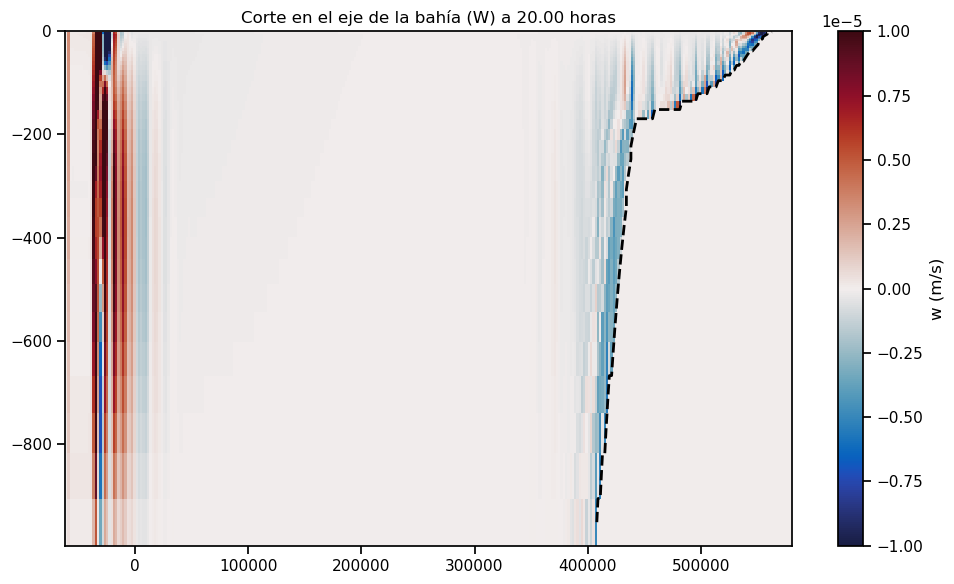

In [ ]:
### ANIMATION PERFIL W: RUN WITH BAY - WITHOUT BAY

W = nc.variables['W'][tt,:,:,EjeXBay] 

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean as cmo
# Crear la figura y el objeto de gráficos iniciales
fig, ax = plt.subplots(figsize=(10, 6))  # Crear figura y ejes
mesh = ax.pcolormesh(YC[:, 0],RC,W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
ax.contour(YC[:, 0], RC, mask3D[:,:,EjeXBay], colors='black', linewidths=2, linestyles='--')
fig.colorbar(mesh, ax=ax, label='w (m/s)')  # Etiqueta de la barra de colores
ax.set_title(f'Corte en el eje de la bahía (W) a {time[tt]/3600:.2f} horas')
#ax.set_aspect(1)
plt.tight_layout()
plt.show()

# Función de actualización para la animación
def update(tt):
    EjeXBay= int(272/2)
    W1 = nc.variables['W'][tt,:,:,EjeXBay]
    W2 = nc2.variables['W'][tt,:,:,EjeXBay]
    W = W1-W2
    mesh.set_array(W.ravel())  # Actualizar los datos del pcolormesh
    ax.set_title(f"f'Corte en el eje de la bahía (W) a {time[tt] / 3600:.2f} horas (Resta)")
    return mesh,

# Crear la animación
anim = FuncAnimation(fig, update, frames=range(0, len(time), 1), blit=True)

# Guardar la animación como archivo o mostrarla
anim.save("animationWperfil_diff1.mp4", fps=2, writer="ffmpeg")  # Para guardar como video
plt.show()  # Para 




In [ ]:
from IPython.display import Video

# Mostrar videos en un notebook
Video('animationEtha.mp4', width=400)



In [ ]:
Video('animationEtha_diff.mp4', width=400)

In [ ]:
### VIDEOS COMPARACIÓN ETHA

from moviepy import VideoFileClip, clips_array

# Rutas de los videos
video1_path = 'animationEtha.mp4'
video2_path = 'animationEtha1.mp4'
#video2_path = 'animationEtha_diff.mp4'

# Cargar los videos
clip1 = VideoFileClip(video1_path)
clip2 = VideoFileClip(video2_path)

combined = clips_array([[clip1, clip2]])
combined.preview()


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1000, 600], 'bitrate': 80, 'fps': 2.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.19.100 libx264'}}], 'input_number': 0}], 'duration': 30.5, 'bitrate': 80, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1000, 600], 'video_bitrate': 80, 'video_fps': 2.0, 'video_duration': 30.5, 'video_n_frames': 61}
/opt/anaconda3/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -i animationEtha.mp4 -loglevel error -f image2pipe -vf scale=1000:600 -sws_flags bicubic

In [ ]:
### VIDEOS COMPARACIÓN W

from moviepy import VideoFileClip, clips_array

# Rutas de los videos
video1_path = 'animationW.mp4'
video2_path = 'animationW1.mp4'
#video2_path = 'animationW_diff.mp4'

# Cargar los videos
clip1 = VideoFileClip(video1_path)
clip2 = VideoFileClip(video2_path)

combined = clips_array([[clip1, clip2]])
combined.preview()


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1000, 600], 'bitrate': 66, 'fps': 2.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.19.100 libx264'}}], 'input_number': 0}], 'duration': 30.5, 'bitrate': 66, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1000, 600], 'video_bitrate': 66, 'video_fps': 2.0, 'video_duration': 30.5, 'video_n_frames': 61}
/opt/anaconda3/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -i animationW.mp4 -loglevel error -f image2pipe -vf scale=1000:600 -sws_flags bicubic -p

In [ ]:
### VIDEOS COMPARACIÓN PERFIL W

from moviepy import VideoFileClip, clips_array

# Rutas de los videos
video1_path = 'animationW1_Nr30.mp4'
video2_path = 'animationWperfil1_Nr30.mp4'
#video2_path = 'animationWperfil_diff.mp4'

# Cargar los videos
clip1 = VideoFileClip(video1_path)
clip2 = VideoFileClip(video2_path)

combined = clips_array([[clip1, clip2]])
combined.preview()


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.7.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1000, 600], 'bitrate': 55, 'fps': 2.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.19.100 libx264'}}], 'input_number': 0}], 'duration': 10.0, 'bitrate': 56, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [1000, 600], 'video_bitrate': 55, 'video_fps': 2.0, 'video_duration': 10.0, 'video_n_frames': 20}
/opt/anaconda3/lib/python3.12/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -i animationW1_Nr30.mp4 -loglevel error -f image2pipe -vf scale=1000:600 -sws_flags bicu

# Funciones de animaciones mpa

In [43]:
### ANIMACIÓN PERFIL W FUNCION

def crear_animacion_perfil_w(
    nc,
    nc2,
    time,
    mask3D,
    YC,
    RC,
    EjeXBay=136,
    titulo_base="Corte en el eje de la bahía (W)",
    nombre_archivo="animationWperfil.mp4",
    resta=False,
    vmin=-1e-5,
    vmax=1e-5,
    fps=2
):
    """
    Crea y guarda una animación de la variable 'W' en un corte vertical 
    (perfil) a lo largo de la coordenada X indicada por 'EjeXBay'.

    Parámetros
    ----------
    nc : netCDF4.Dataset o MIT.mnc_files
        Archivo NetCDF (con bahía).
    nc2 : netCDF4.Dataset o MIT.mnc_files
        Segundo archivo NetCDF (sin bahía). Solo se usa si resta=True.
    time : array-like
        Arreglo con los valores de tiempo (en segundos).
    mask3D : np.ndarray
        Máscara 3D para dibujar contornos (por ejemplo, hFacC == 0).
    YC : np.ndarray
        Coordenadas Y (2D o 1D que coincidan con tu corte).
    RC : np.ndarray
        Coordenadas verticales.
    EjeXBay : int
        Índice a lo largo de X donde se hace el corte de la bahía.
    titulo_base : str
        Título base de la animación.
    nombre_archivo : str
        Nombre del archivo donde se guardará la animación (formato .mp4).
    resta : bool
        Si True, anima la diferencia W1 - W2 (con bahía - sin bahía).
        Si False, anima únicamente W1 (con bahía).
    vmin : float
        Valor mínimo para la escala de colores.
    vmax : float
        Valor máximo para la escala de colores.
    fps : int
        Frames por segundo para la animación en video.

    Devuelve
    --------
    anim : matplotlib.animation.FuncAnimation
        Objeto de animación que se puede usar o mostrar en línea.
    """
    
    # 1. Crear figura y ejes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 2. Frame inicial para dimensionar correctamente el pcolormesh
    W1_init = nc.variables['W'][0, :, :, EjeXBay]
    W2_init = nc2.variables['W'][0, :, :, EjeXBay] if resta else 0
    W_init = W1_init - W2_init if resta else W1_init
    
    # 3. Crear el pcolormesh inicial
    mesh = ax.pcolormesh(
        YC[:, 0],  # Eje horizontal (latitud)
        RC,        # Eje vertical (profundidad)
        W_init, 
        vmin=vmin, 
        vmax=vmax, 
        cmap=cmo.cm.balance
    )
    
    # Añadir contorno de la máscara 3D
    ax.contour(YC[:, 0], RC, mask3D[:, :, EjeXBay], 
               colors='black', linewidths=2, linestyles='--')
    
    # 4. Crear barra de color
    cbar = fig.colorbar(mesh, ax=ax, label='Velocidad vertical w (m/s)')
    
    # 5. Ajustar título inicial
    ax.set_title(f"{titulo_base} a {time[0] / 3600:.2f} horas")
    
    # Ejes
    ax.set_xlabel("Latitud (°)")
    ax.set_ylabel("Profundidad (m)")

    # Ajustes de layout
    plt.tight_layout()

    # 6. Definir función de actualización
    def update(tt):
        W1_frame = nc.variables['W'][tt, :, :, EjeXBay]
        W2_frame = nc2.variables['W'][tt, :, :, EjeXBay] if resta else 0
        W_frame = W1_frame - W2_frame if resta else W1_frame

        # Actualizamos los datos del pcolormesh
        mesh.set_array(W_frame.ravel())
        
        # Actualizamos el título con el tiempo actual
        if resta:
            ax.set_title(
                f"{titulo_base} (resta) a {time[tt] / 3600:.2f} horas"
            )
        else:
            ax.set_title(
                f"{titulo_base} a {time[tt] / 3600:.2f} horas"
            )
        return mesh,

    # 7. Crear la animación
    anim = FuncAnimation(
        fig,
        update,
        frames=range(len(time)),
        blit=True
    )

    # 8. Guardar la animación en un archivo mp4 y mostrar
    anim.save(nombre_archivo, fps=fps, writer="ffmpeg")
    plt.show()
    
    return anim


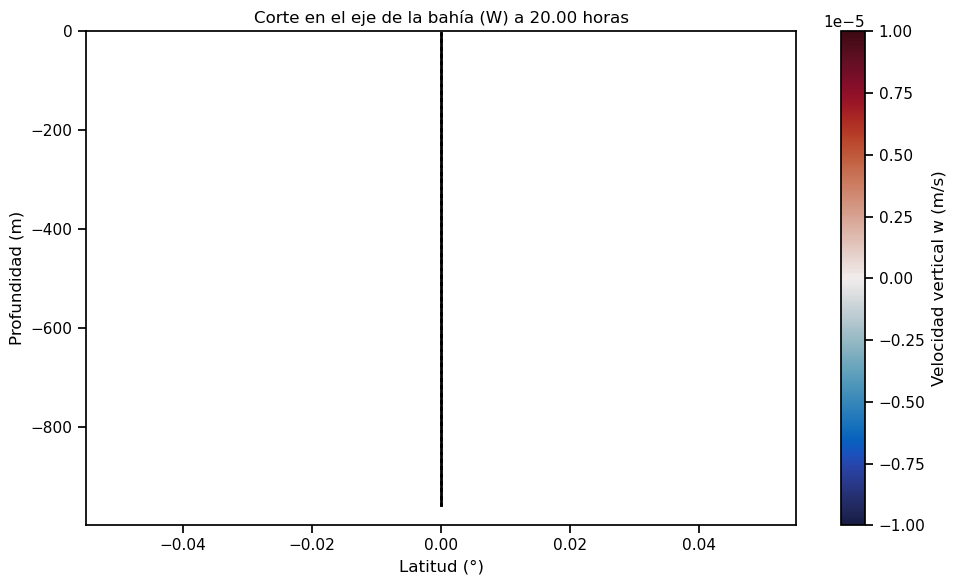

In [44]:
# Ejemplo de uso:
anim_perfil = crear_animacion_perfil_w(
    nc=nc,
    nc2=nc2,
    time=time,
    mask3D=mask3D,
    YC=YC,
    RC=RC,
    EjeXBay=136,  # Ajusta según corresponda
    titulo_base="Corte en el eje de la bahía (W)",
    nombre_archivo="animationWperfil1_Nr50.mp4",
    resta=False,  # Pon True si quieres la diferencia W1 - W2
    vmin=-1e-5,
    vmax=1e-5,
    fps=2
)
